# Insurance Fraud Claim Project

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
dx=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
dx

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
dx.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
dx.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
dx.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
dx.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
dx.shape

(1000, 40)

AS the column _c39 has missing values present so i can remove the columns.

In [9]:
dx.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
dx.drop(["_c39"], axis=1, inplace=True)

# Seperating Categorical and Numerical values

In [12]:
s = (dx.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [13]:
s = (dx.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [14]:
cont_cols.append('policy_annual_premium')

In [16]:
dx[cate_cols].head(7)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
5,12-10-2006,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,02-01-2015,Multi-vehicle Collision,...,Major Damage,Fire,SC,Arlington,8973 Washington St,NO,NO,Saab,95,Y
6,04-06-2000,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,13-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,?,?,Nissan,Pathfinder,N


In [17]:
dx[cont_cols].head(7)

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
0,328,48,521585,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1406.91
1,228,42,342868,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1197.22
2,134,29,687698,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,1413.14
3,256,41,227811,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1415.74
4,228,44,367455,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,1583.91
5,256,39,104594,1000,0,478456,0,0,19,3,0,2,64100,6410,6410,51280,2003,1351.10
6,137,34,413978,1000,0,441716,0,-77000,0,3,0,0,78650,21450,7150,50050,2012,1333.35


In [18]:
dx[cont_cols].describe()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,1256.406150
std,115.113174,9.140287,257063.005276,611.864673,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,244.167395
min,0.000000,19.000000,100804.000000,500.000000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,433.330000
25%,115.750000,32.000000,335980.250000,500.000000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1089.607500
50%,199.500000,38.000000,533135.000000,1000.000000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,1257.200000
75%,276.250000,44.000000,759099.750000,2000.000000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,1415.695000
max,479.000000,64.000000,999435.000000,2000.000000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2047.590000



Count for all the columns is 1000, hence there are no missing values in these columns.

The mean of months_as_customer is 203.95 and the mode is 199.50. The range is 0 - 479 and IQR is 115.75 - 276.25.

The mean of age is 38.95 and the mode is 38. The range of age is 19 - 64 and IQR is 32 - 44.

The mean of policy_deductable is 1136 and the mode is 1000. The range of policy_deductable is 500 - 2000 and IQR is also 500 - 2000.

Mode of umbrella_limit is 0 and range is -1000000 - 1000000.

The mean of capital-gains is 25126.10 and the mode is 0. The range is 0 - 100500.

The mean of capital-loss is -26793.70 and the mode is -23250.00. The range is -111100.00 - 0.

The mode of incident_hour of the day is 12.

The mean of total_claim_amount is 52761.94 and the mode is 58055.00. The range is 100 - 114920.00 and IQR is 41812.50 - 70592.50.

The mean of injury_claims is 7433.42 and the mode is 6775.00. The range is 0 - 21450 and IQR is 4295.00 - 11305.00.

The mean of property_claim is 7399.57 and the mode is 6750.00. The range is 0 - 23670.00 and IQR is 4445.00 - 10885.00.

The mean of vehicle_claim is 37928.95 and the mode is 42100.00. The range is 70 - 79560.00 and IQR is 30292.50 - 50822.50.

The mode of auto_year is 2005 and the range is 1995 - 2015.

The mean of policy_annual_premium is 1256.41 and the mode is 1257.20. The range is 433.33 - 2047.59 and IQR is 1089.61 - 1415.69.

# Checking and treating missing values

In [19]:
dx.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Graphical Representation 

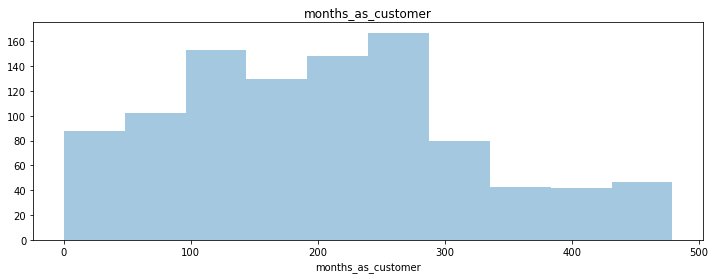

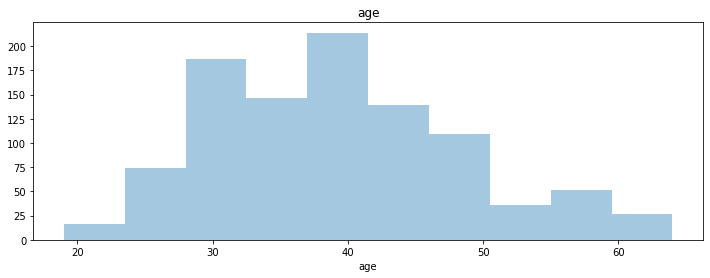

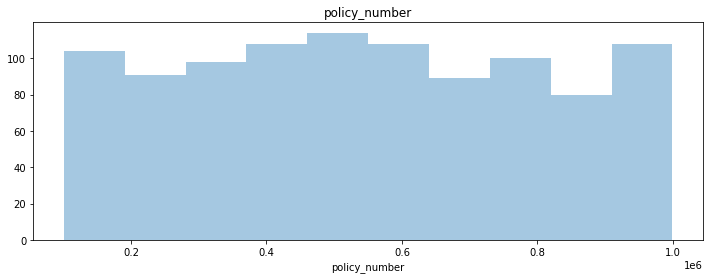

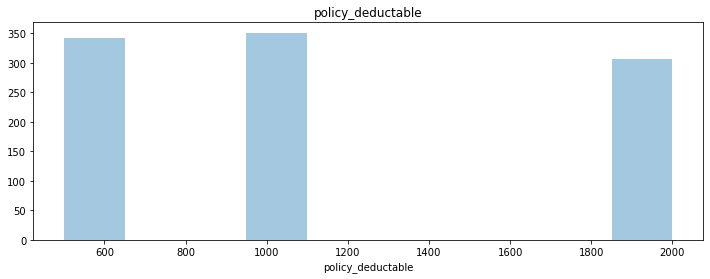

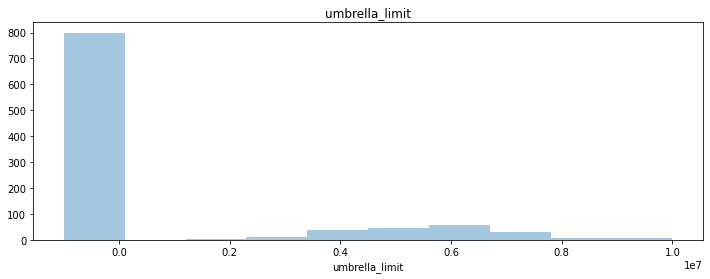

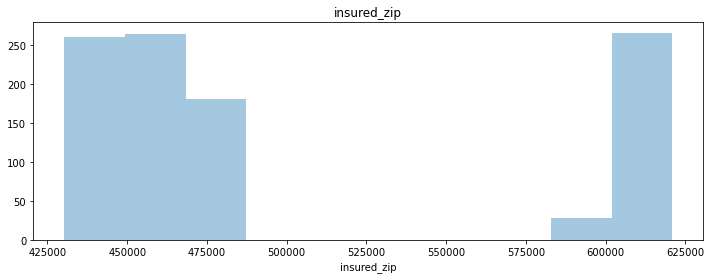

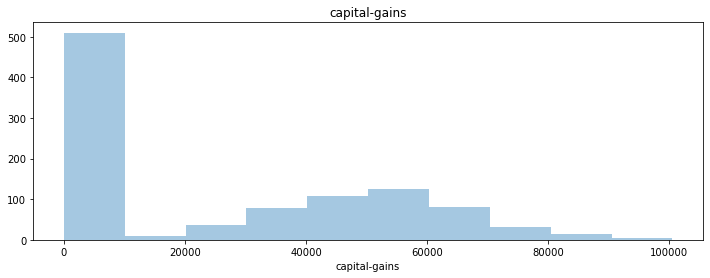

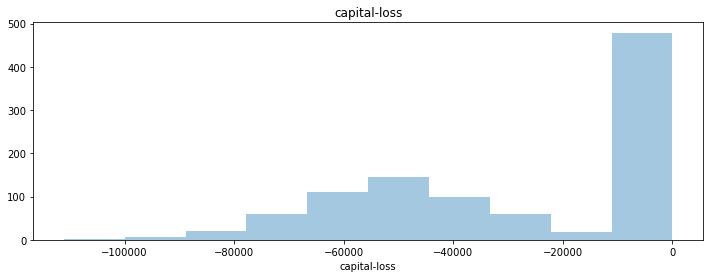

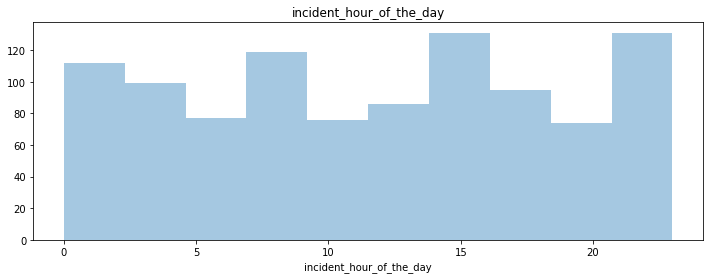

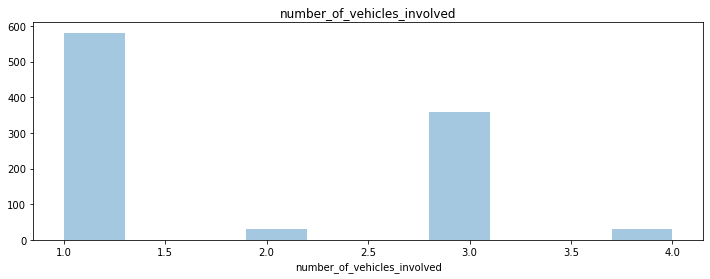

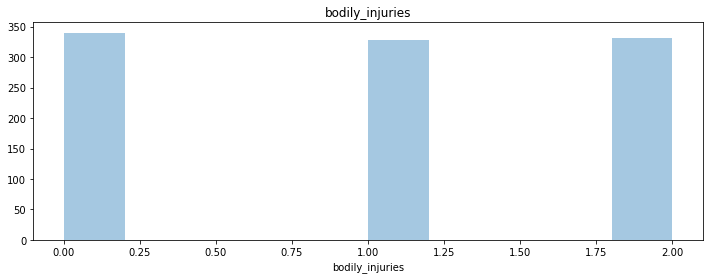

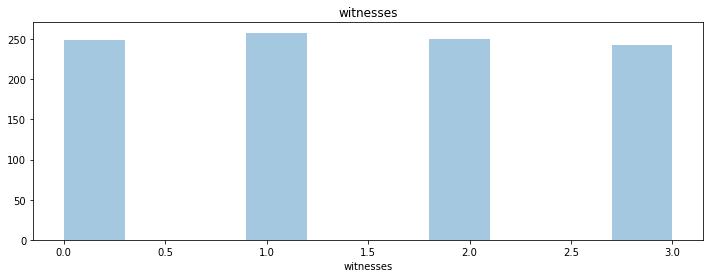

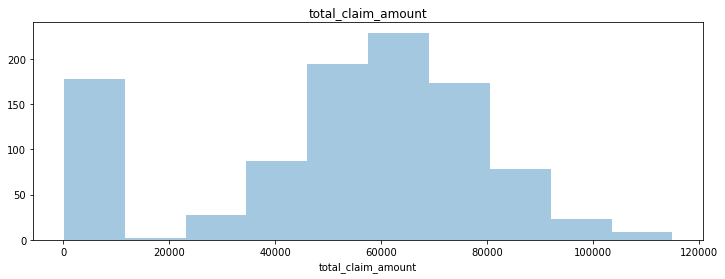

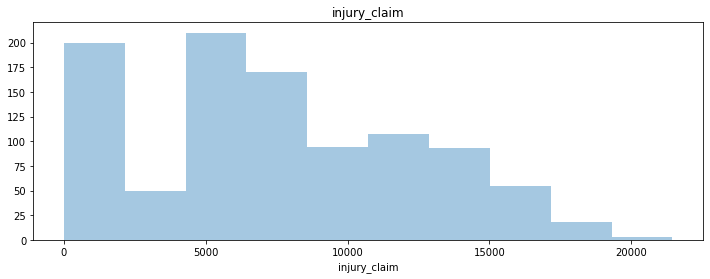

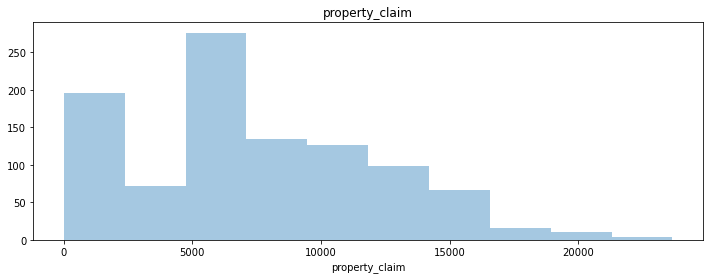

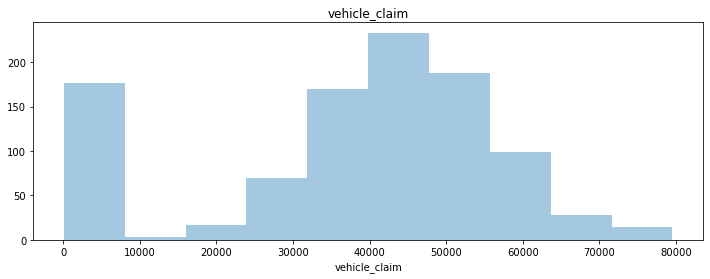

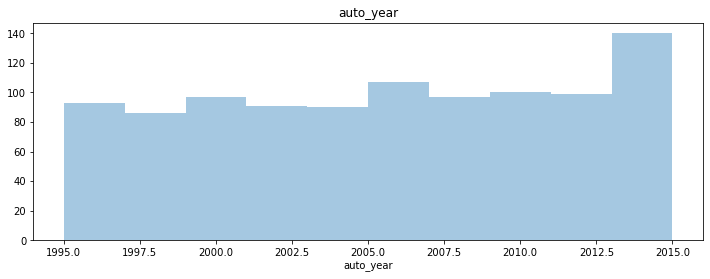

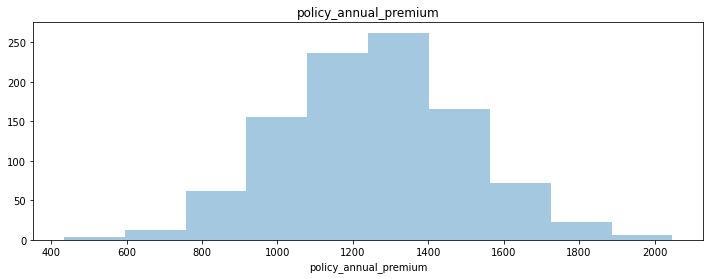

In [22]:
for i in dx[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (12, 4))
    sns.distplot(dx[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

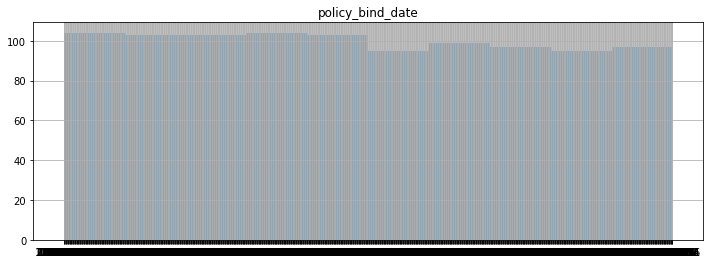

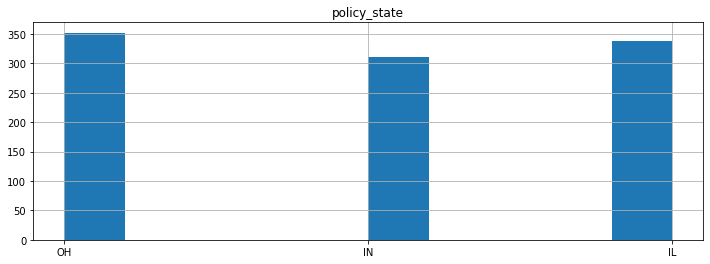

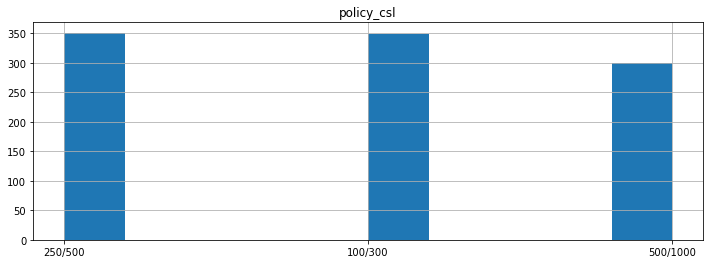

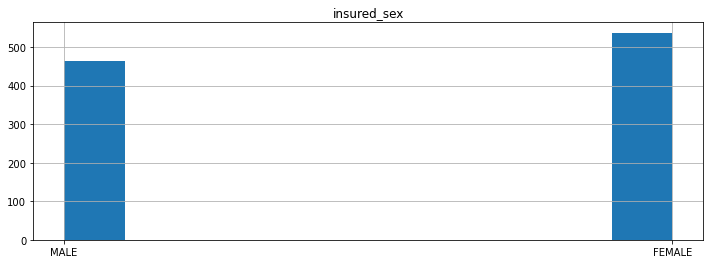

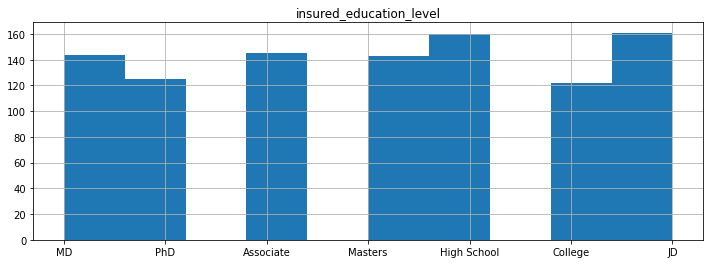

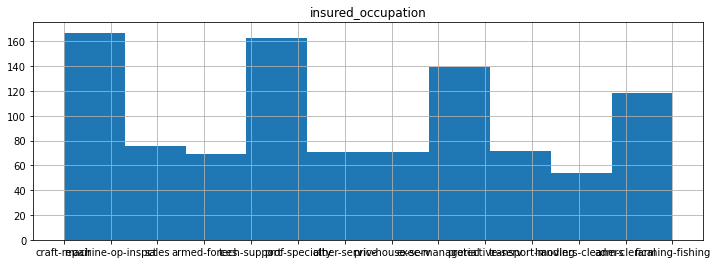

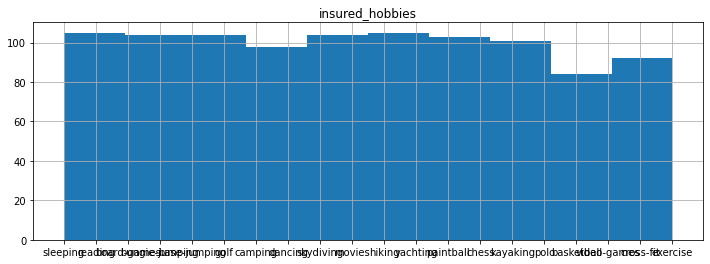

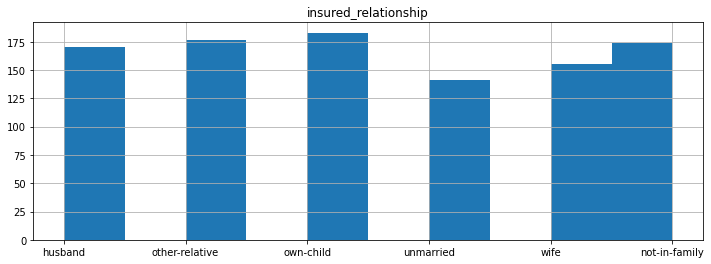

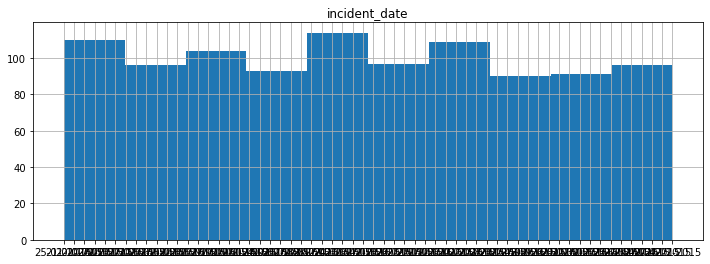

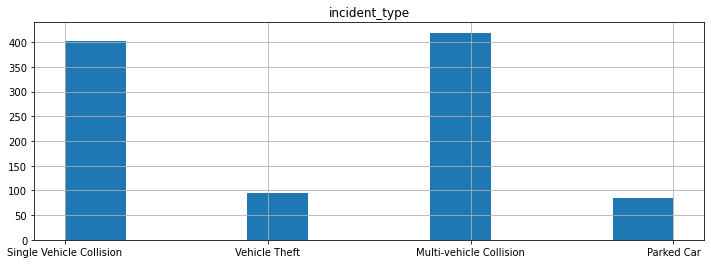

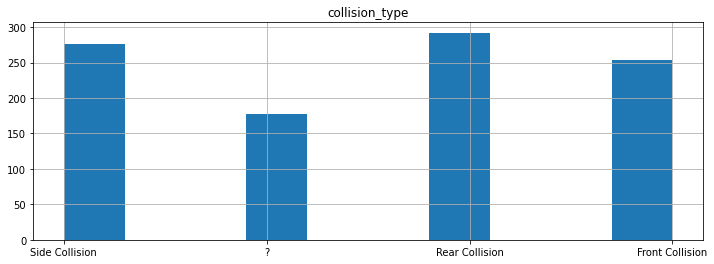

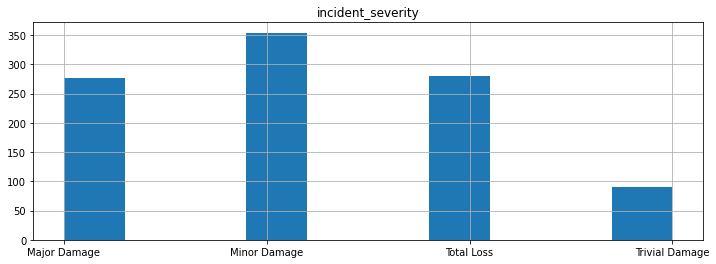

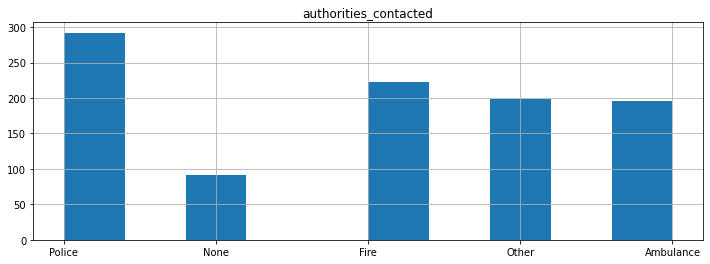

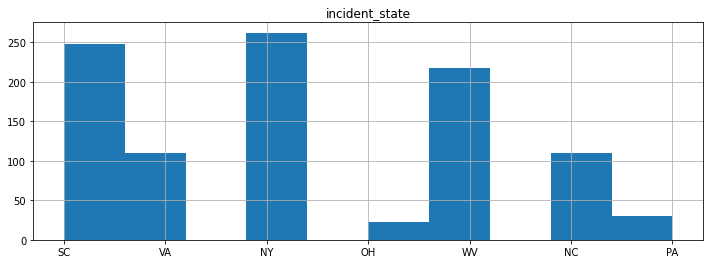

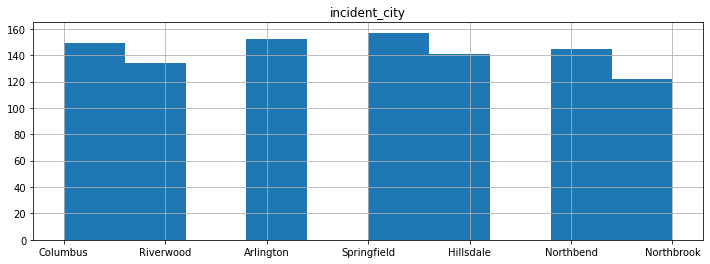

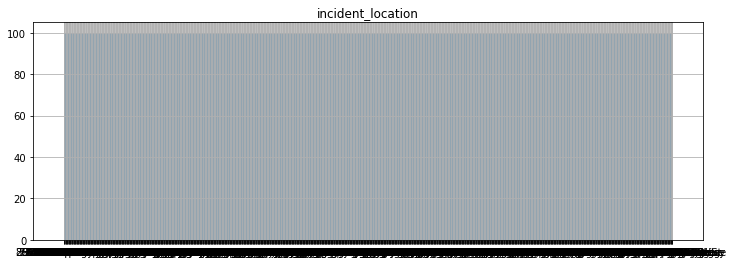

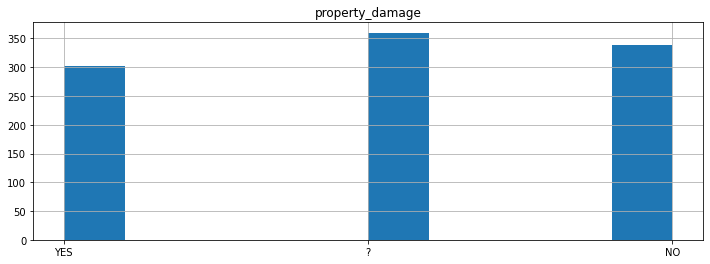

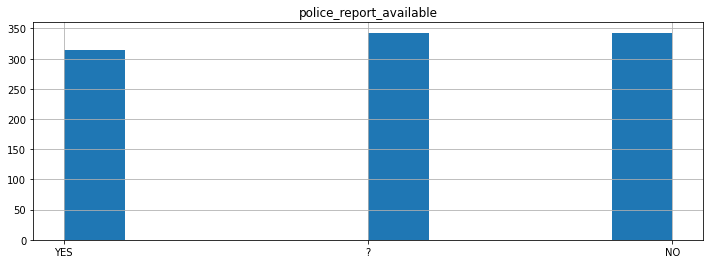

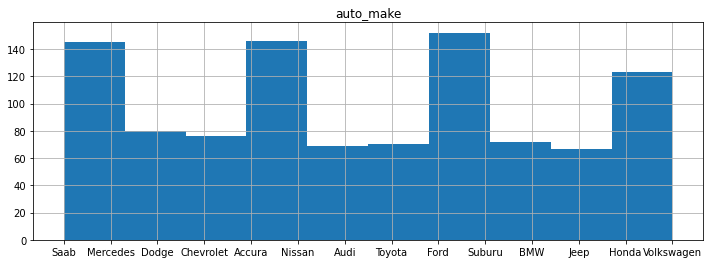

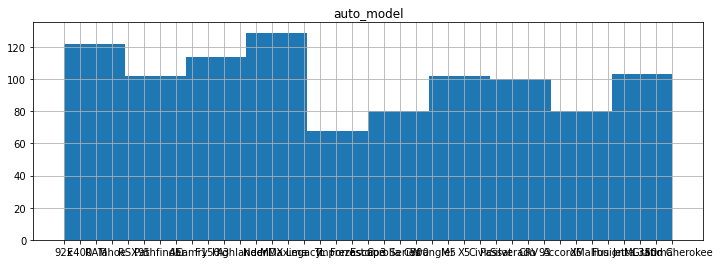

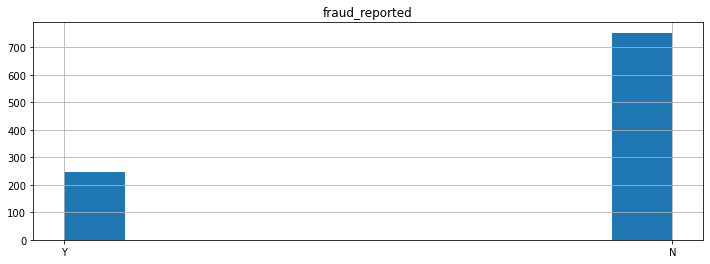

In [25]:
for i in cate_cols:                                 #univariate analysis
    plt.figure(figsize = (12, 4))
    dx[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [26]:
dx.drop(['policy_bind_date', 'incident_date', 'incident_location'], axis = 1, inplace = True)

In [27]:
dx.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [28]:
dx.shape

(1000, 36)

In [30]:
cate_cols.remove('policy_bind_date')
cate_cols.remove('incident_date')
cate_cols.remove('incident_location')

In [31]:
dx[cate_cols].head(10)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N
5,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,NO,NO,Saab,95,Y
6,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,?,?,Nissan,Pathfinder,N
7,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,?,YES,Audi,A5,N
8,IL,100/300,FEMALE,PhD,other-service,golf,own-child,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,NO,YES,Toyota,Camry,N
9,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,NO,?,Saab,92x,N


In [33]:
dx['collision_type'].replace('?', 'Unknown', inplace = True)
dx['property_damage'].replace('?', 'Unknown', inplace = True)
dx['police_report_available'].replace('?', 'Unknown', inplace = True)

In [35]:
dx[cate_cols].head(10)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,Unknown,Unknown,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,Unknown,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N
5,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,NO,NO,Saab,95,Y
6,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,Unknown,Unknown,Nissan,Pathfinder,N
7,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,Unknown,YES,Audi,A5,N
8,IL,100/300,FEMALE,PhD,other-service,golf,own-child,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,NO,YES,Toyota,Camry,N
9,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,NO,Unknown,Saab,92x,N


Sucessfully replaced with "unknown"

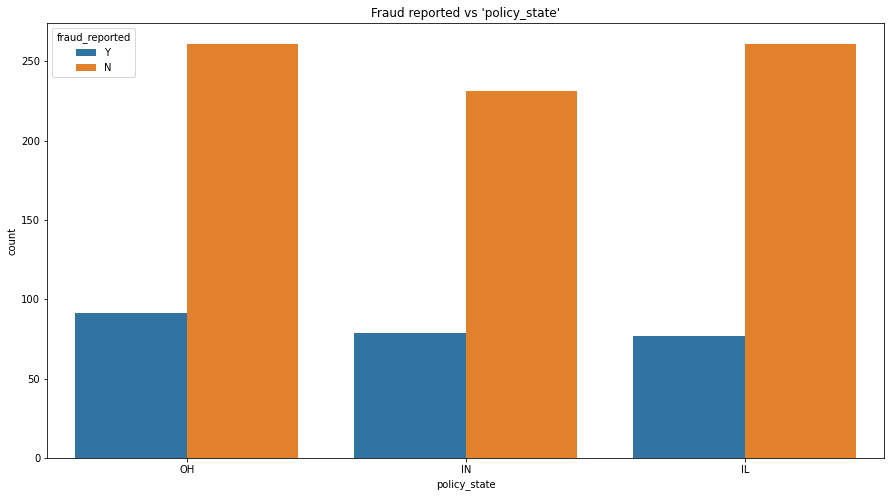

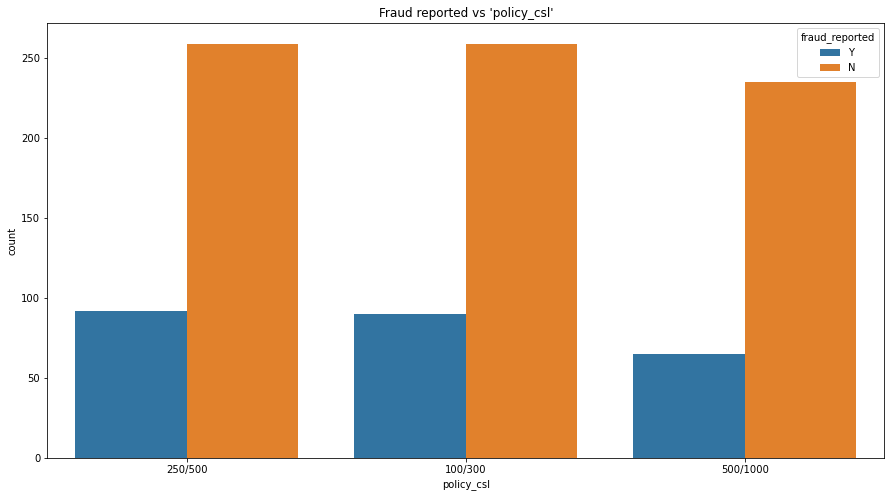

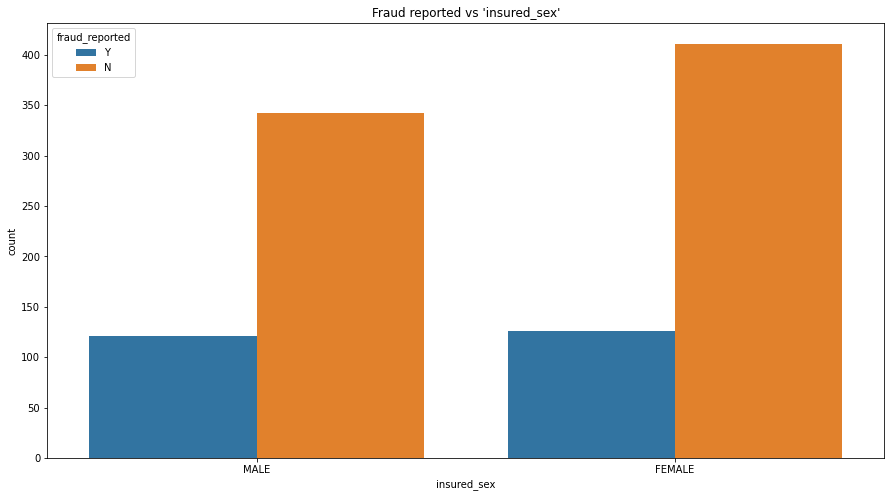

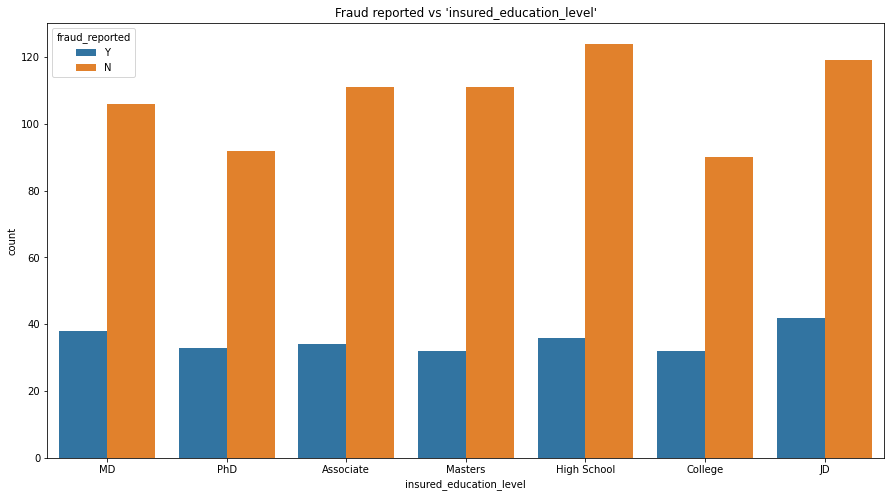

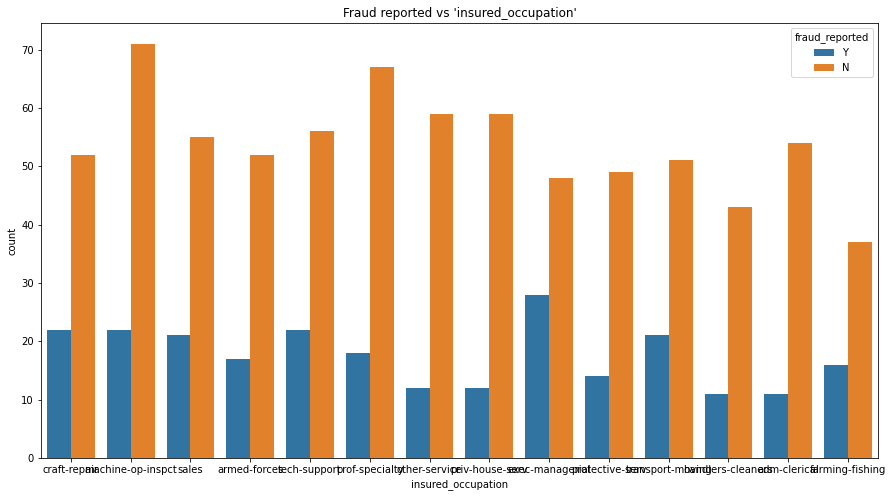

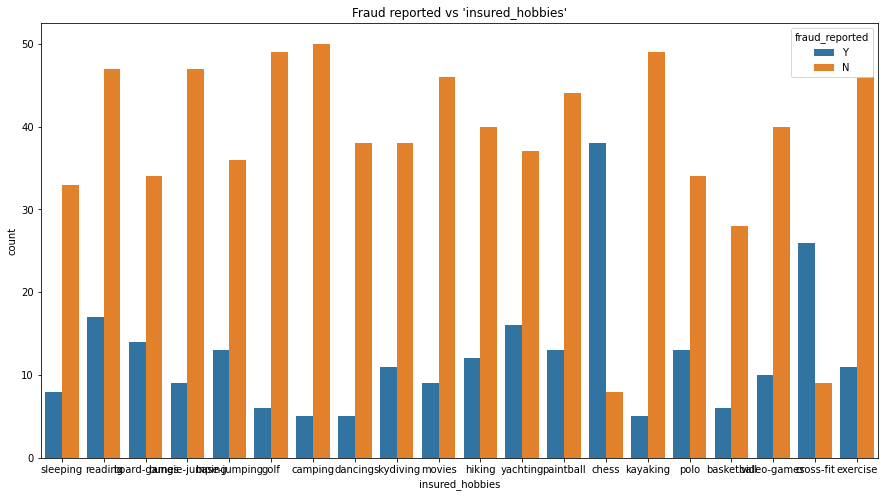

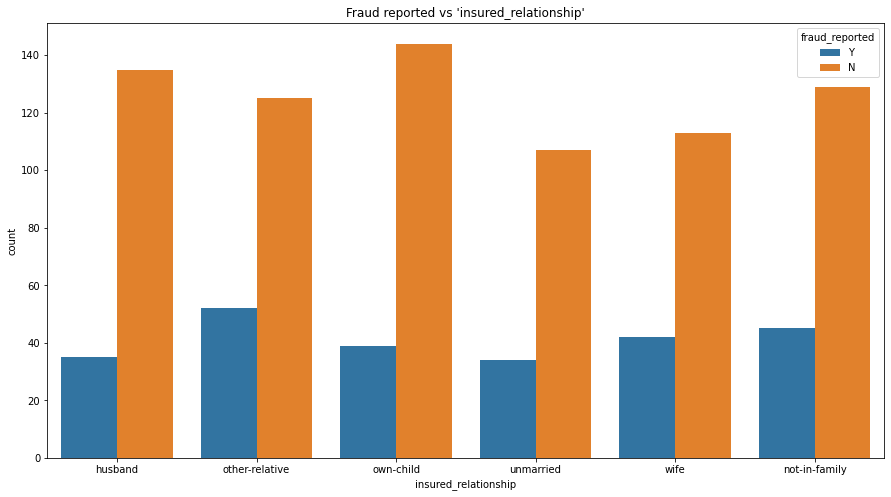

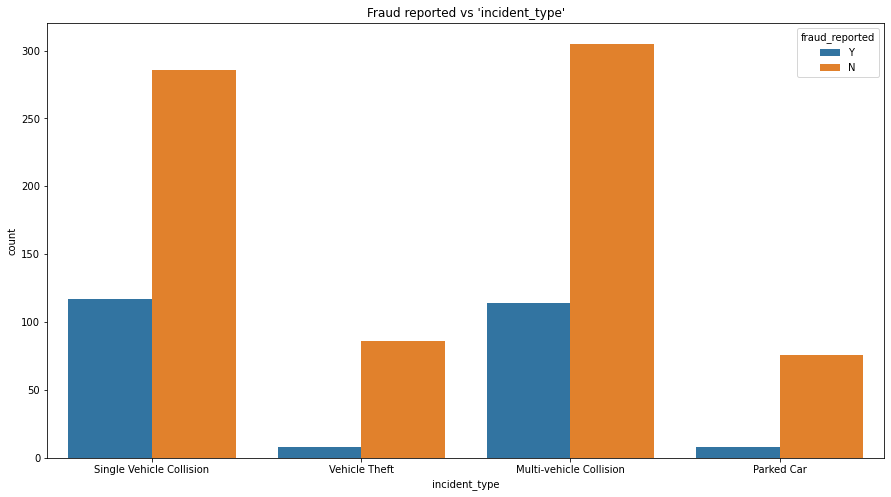

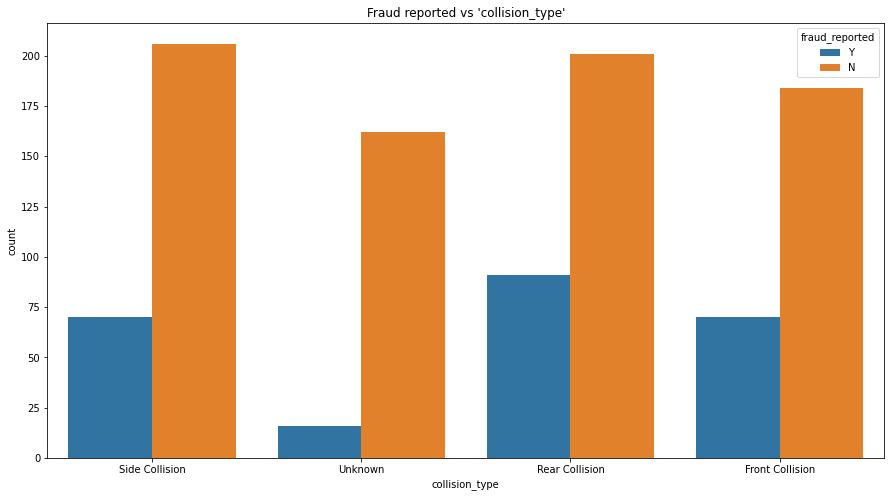

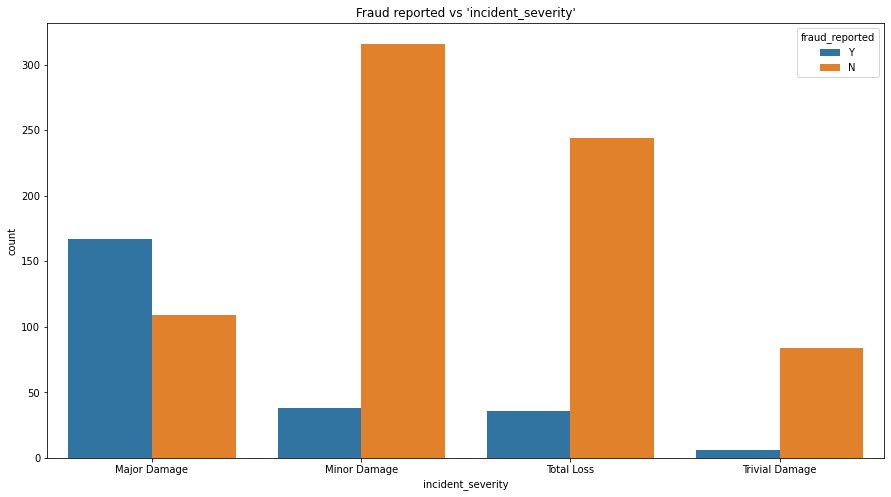

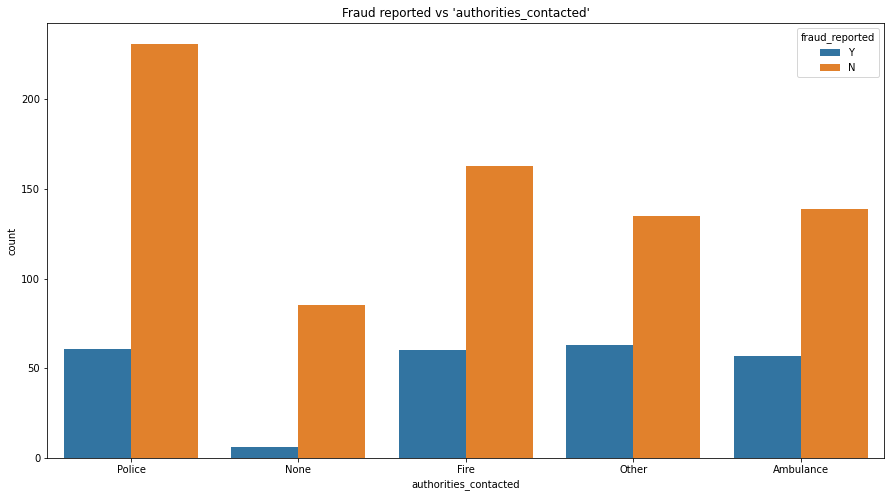

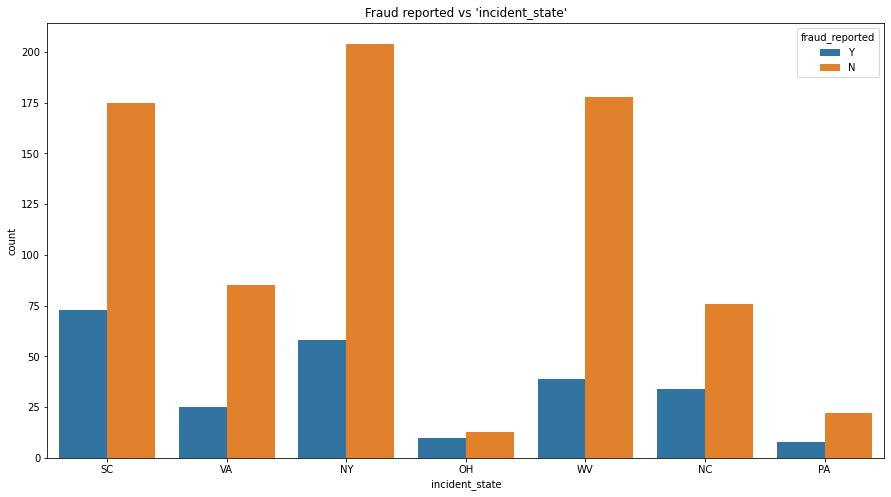

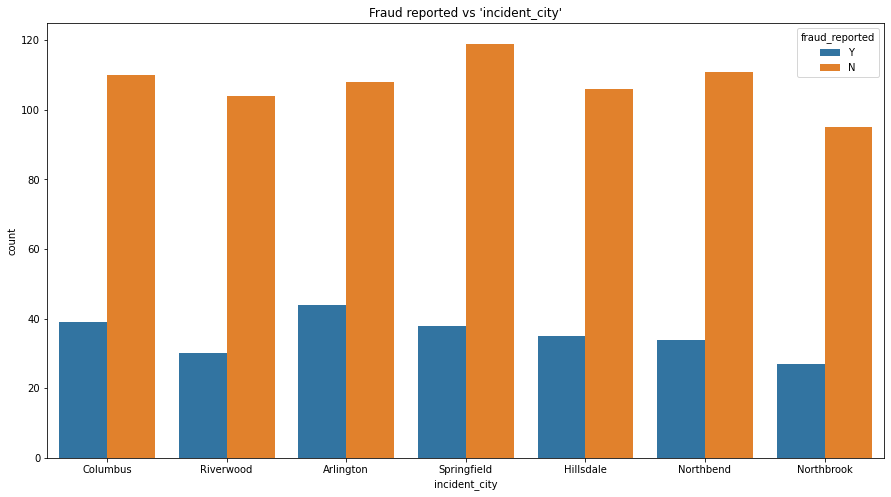

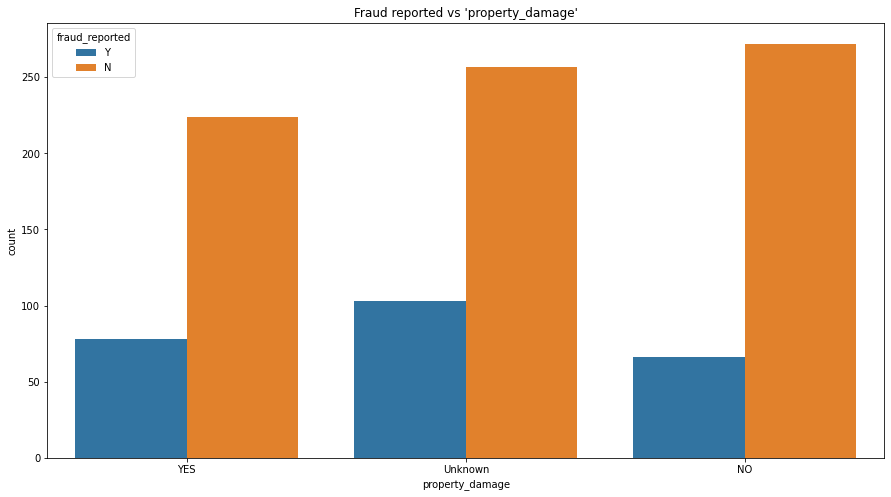

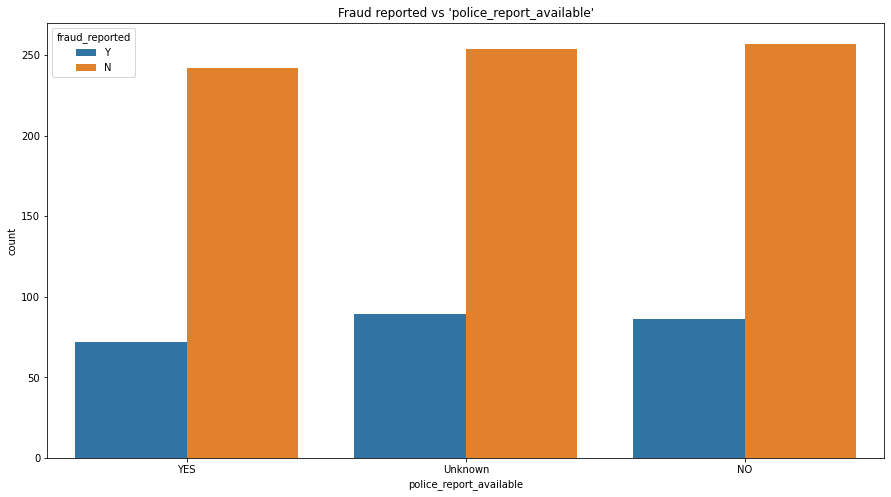

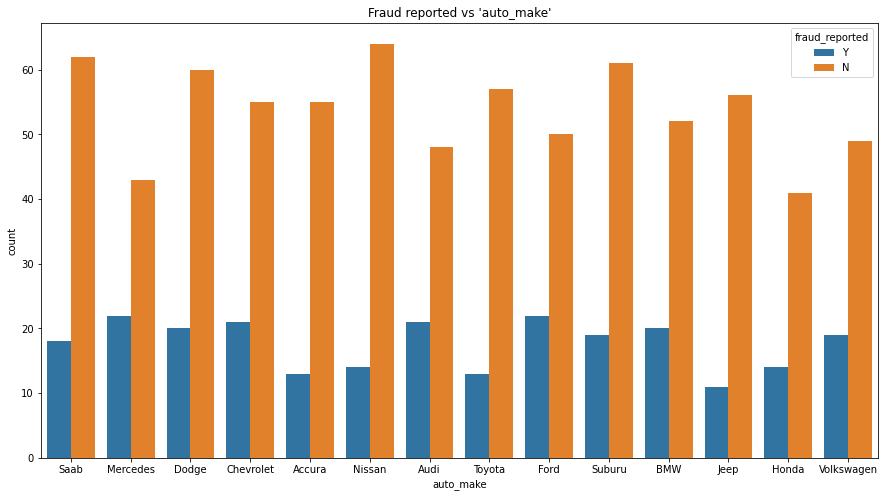

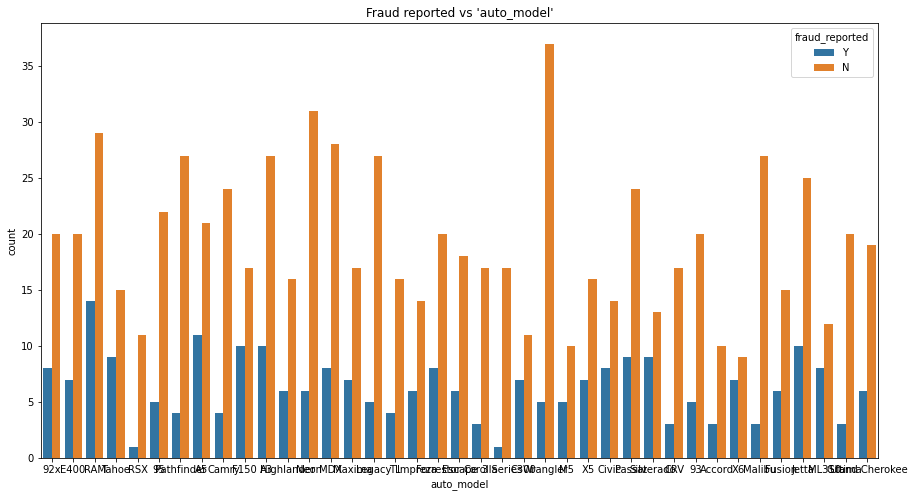

In [36]:
for i in cate_cols[:-1]:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title("Fraud reported vs '%s'"%i)
    sns.countplot(dx[i],hue=dx['fraud_reported'])

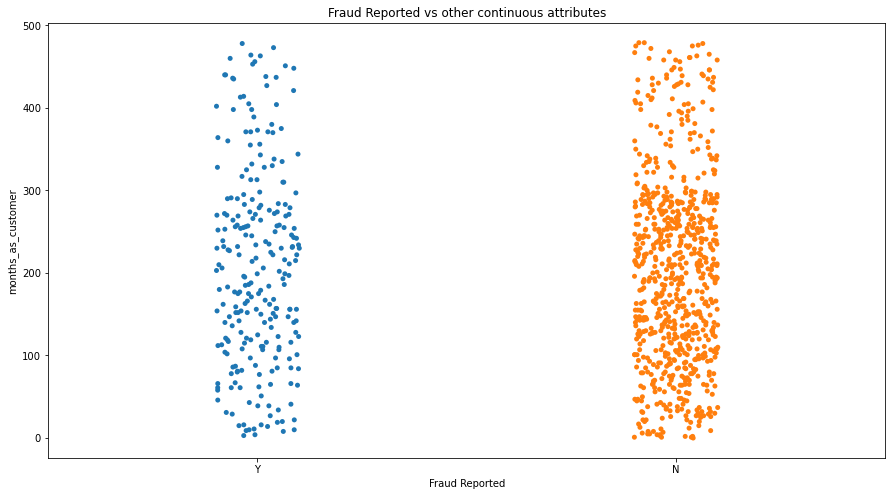

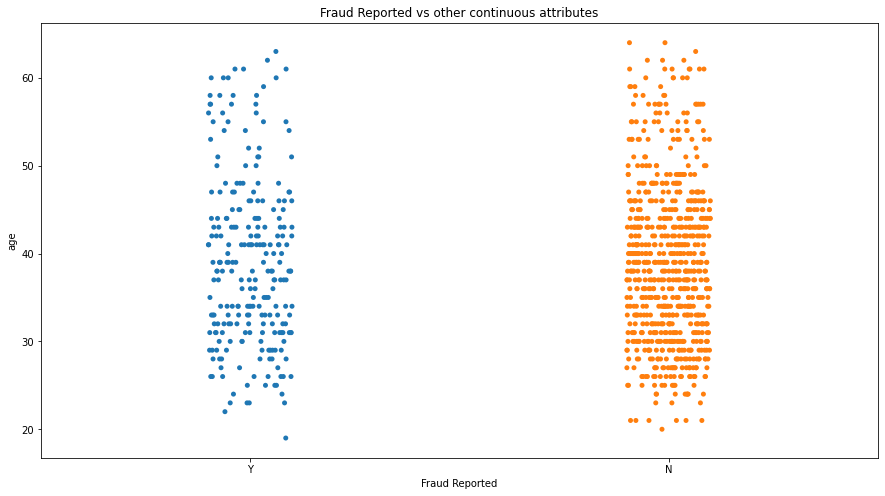

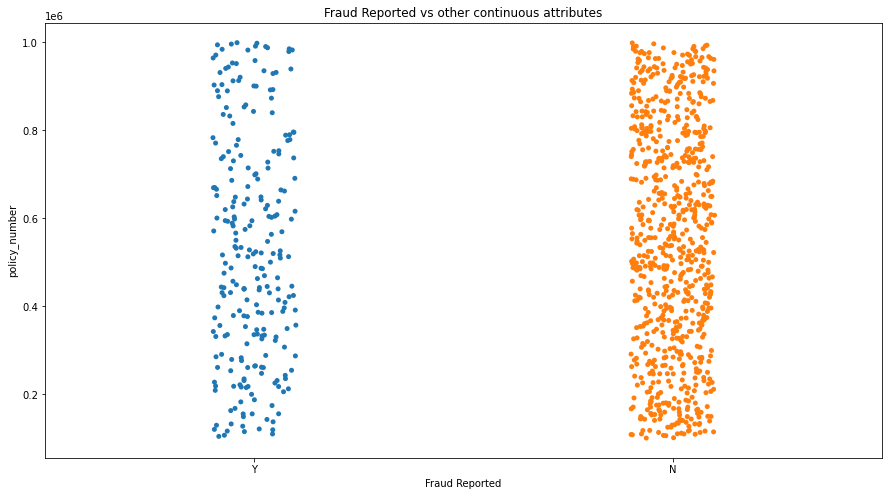

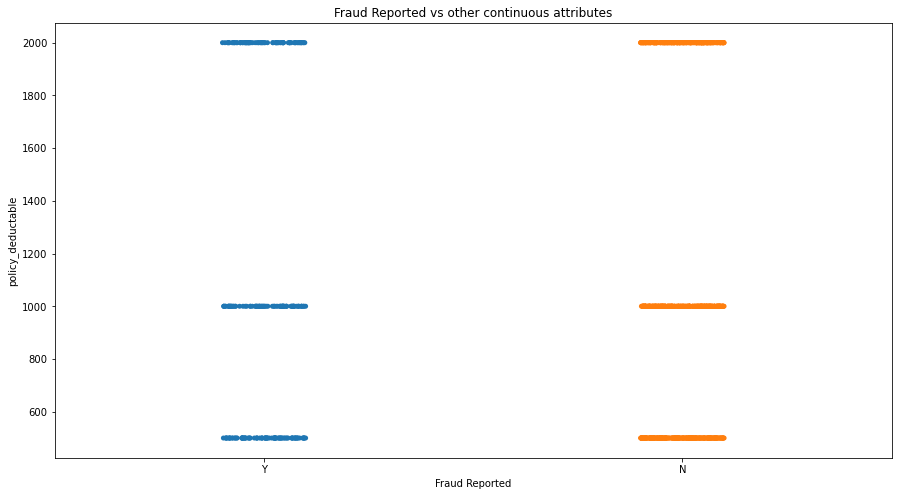

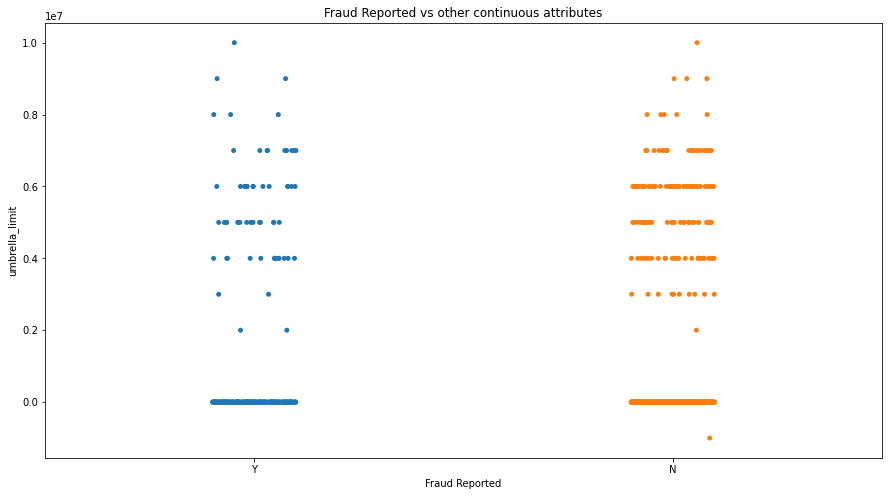

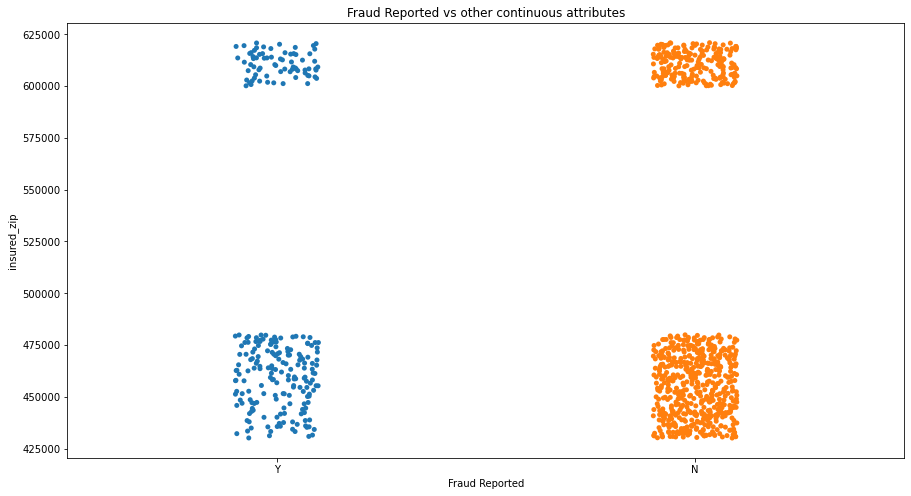

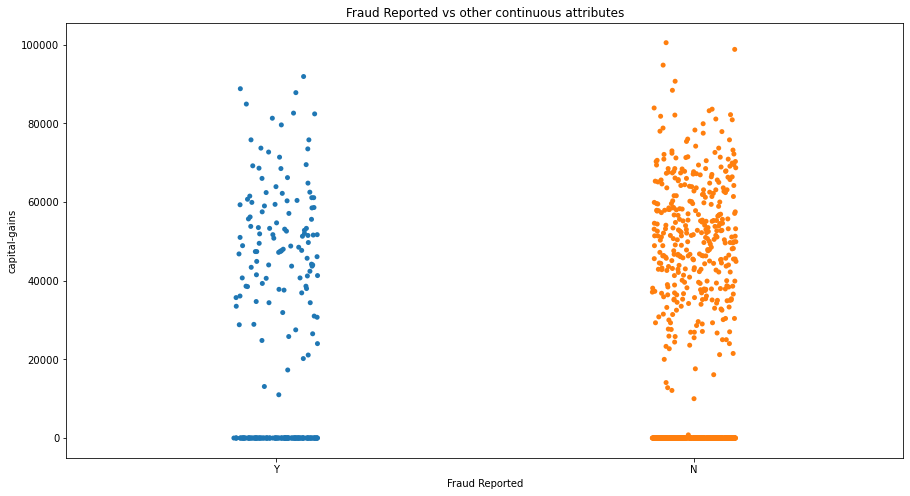

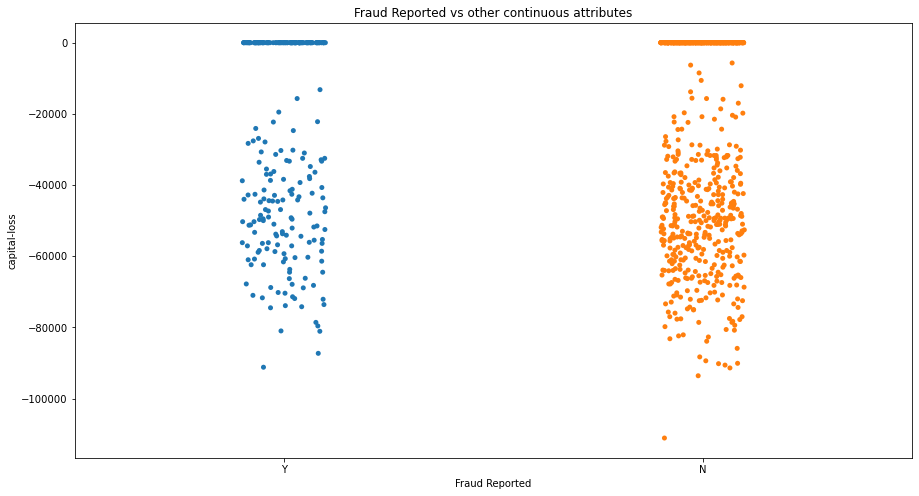

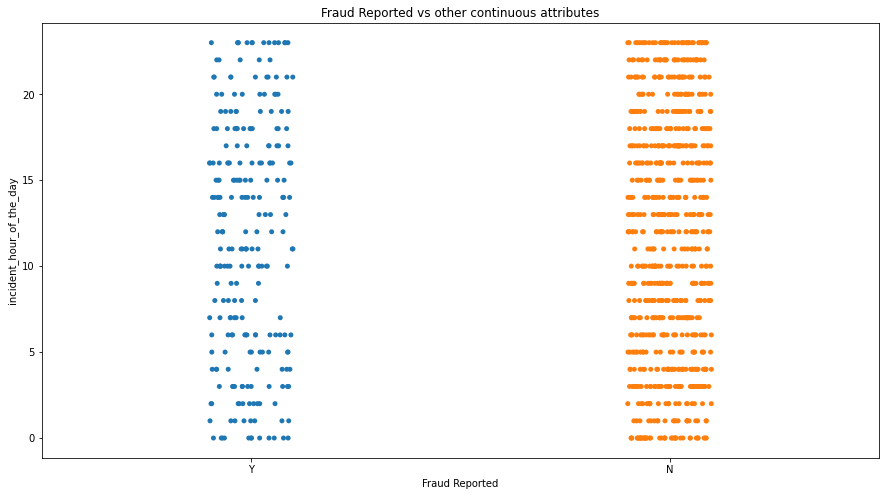

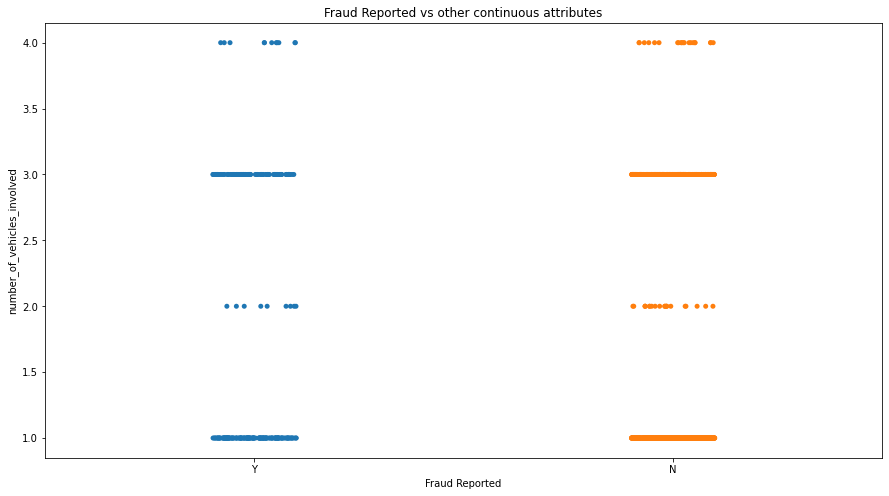

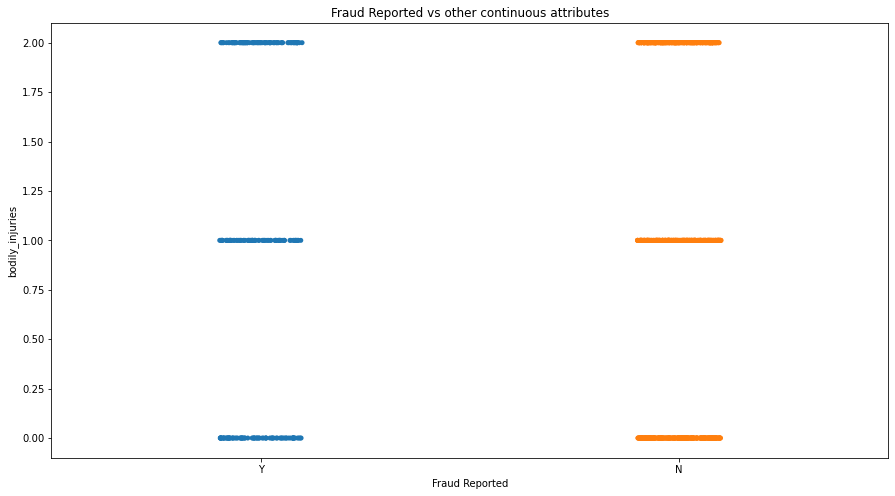

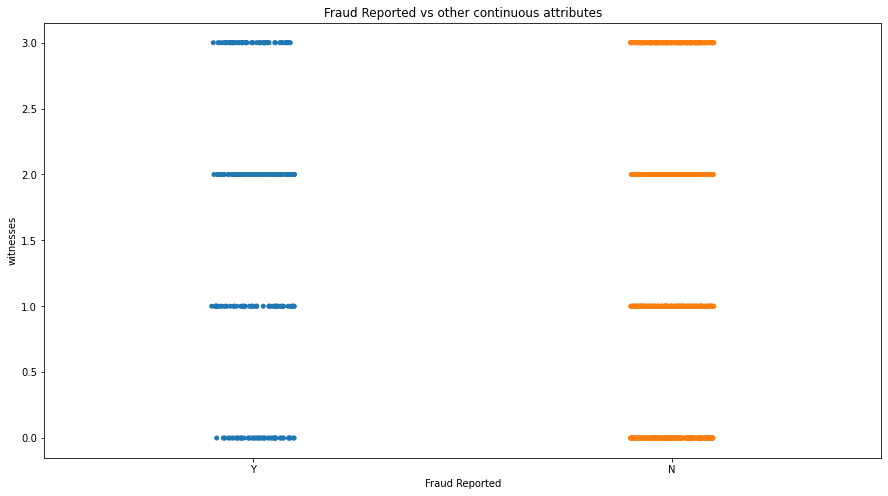

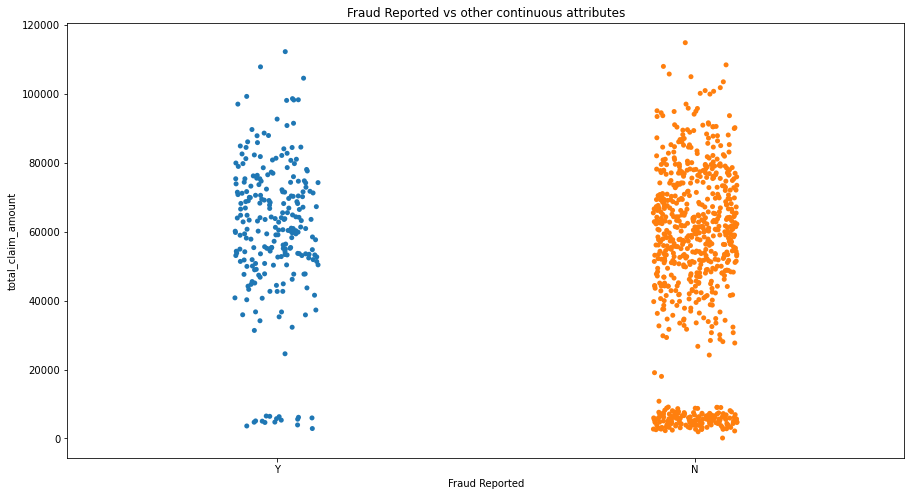

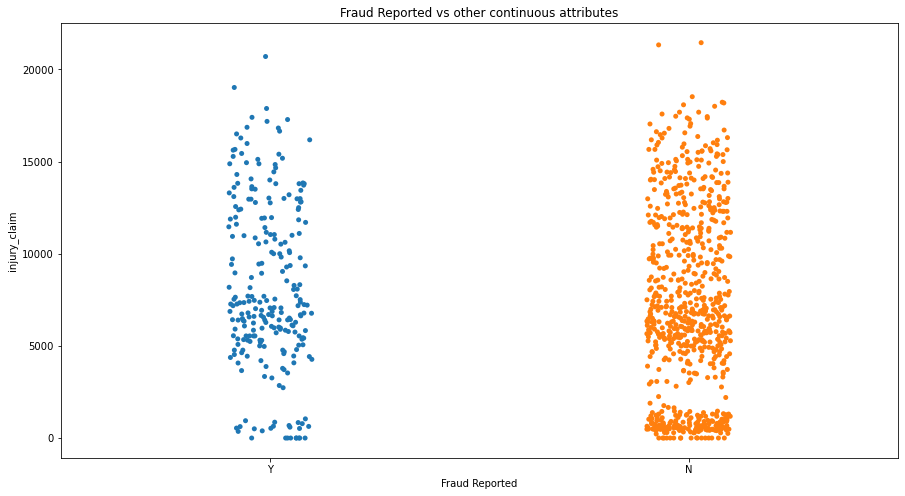

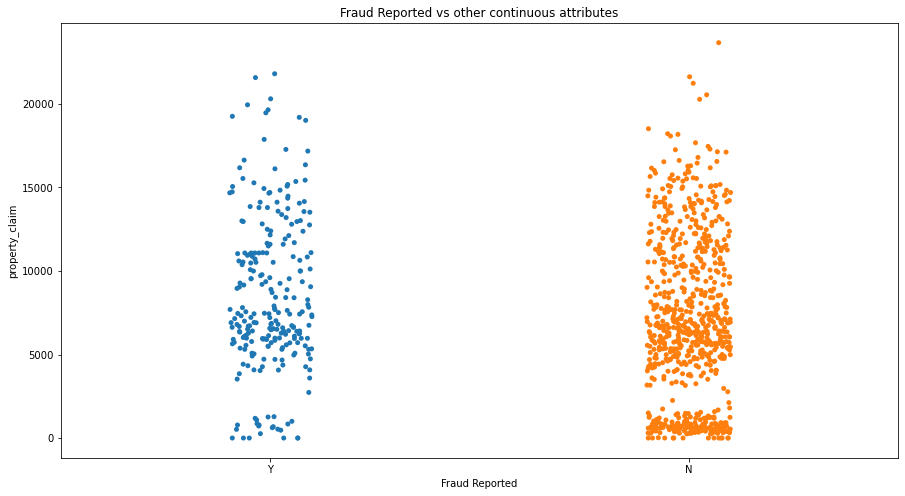

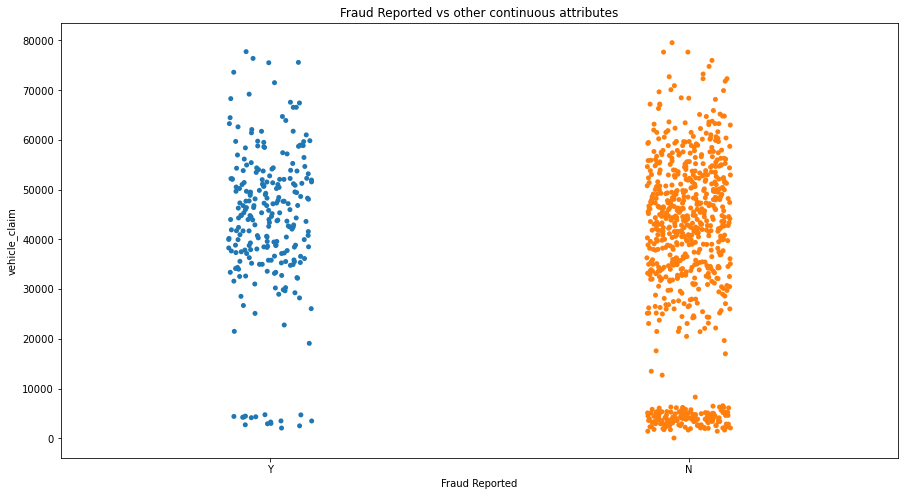

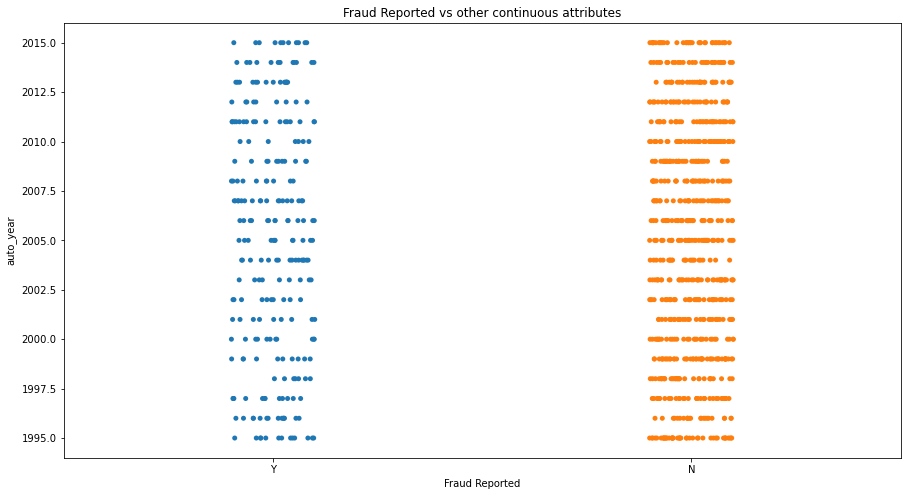

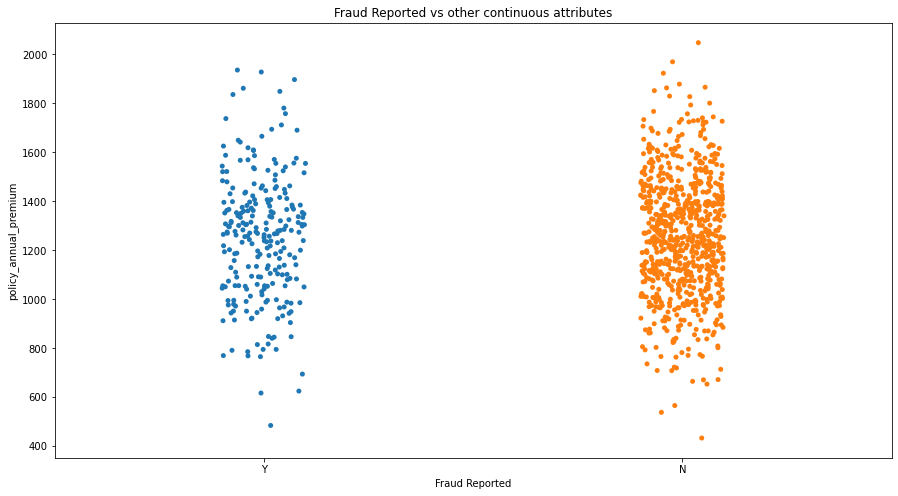

In [38]:
for i in cont_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(dx['fraud_reported'], dx[i])
    ax.set(xlabel = 'Fraud Reported', ylabel = i)
    plt.title('Fraud Reported vs other continuous attributes')
    plt.show()

In [39]:
dx['fraud_reported'].replace('N', 0, inplace = True)
dx['fraud_reported'].replace('Y', 1, inplace = True)

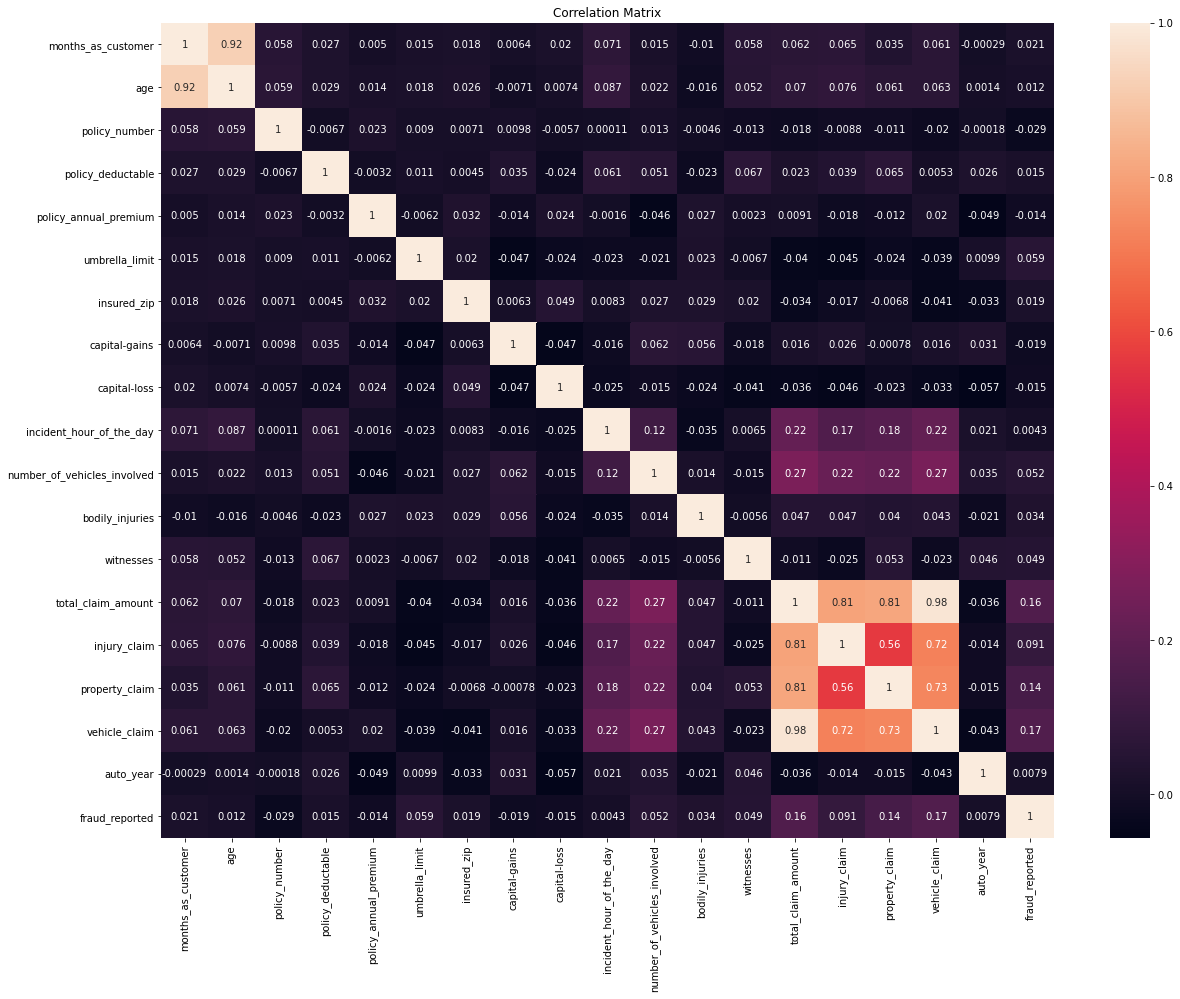

In [40]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(dx.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

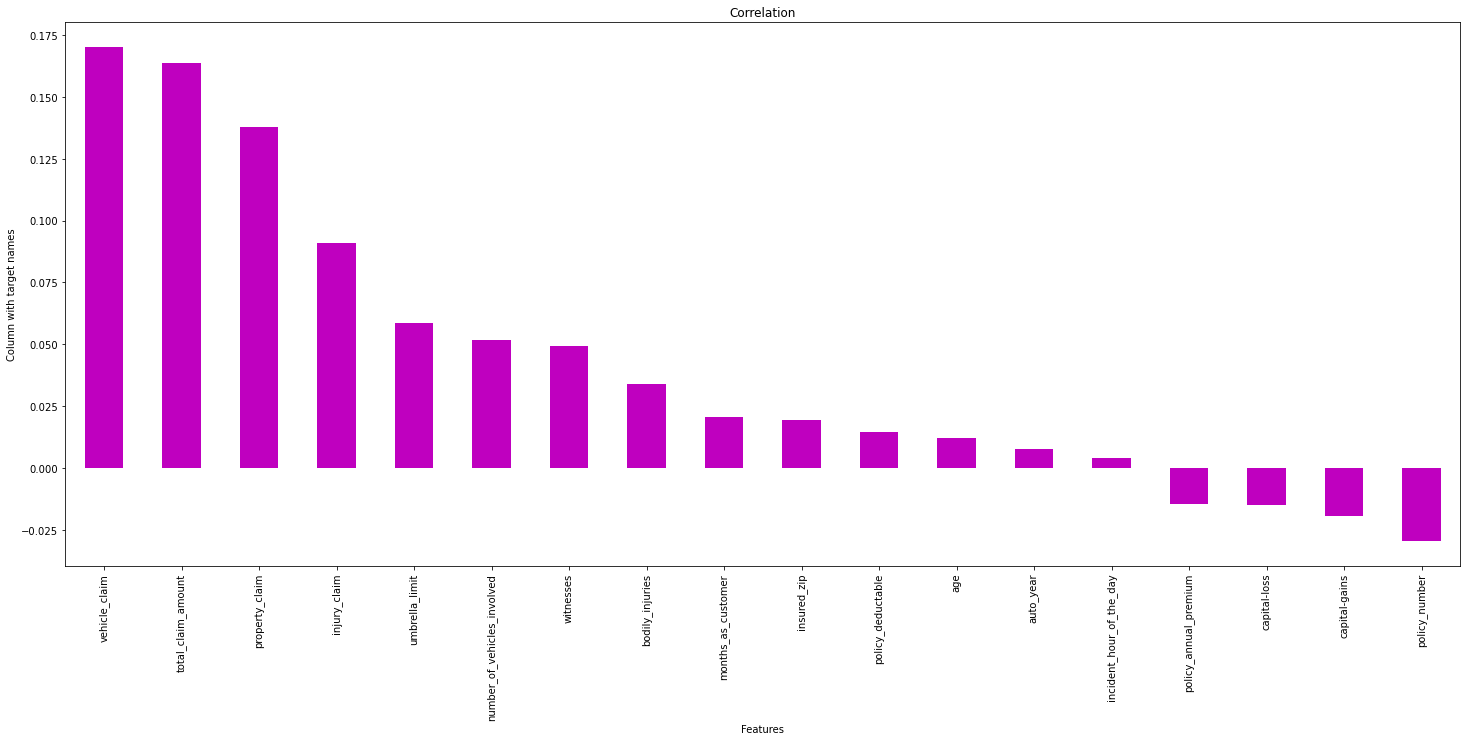

In [41]:
plt.figure(figsize = (25, 10))
dx.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'm')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

# Checking Outliers and skweness

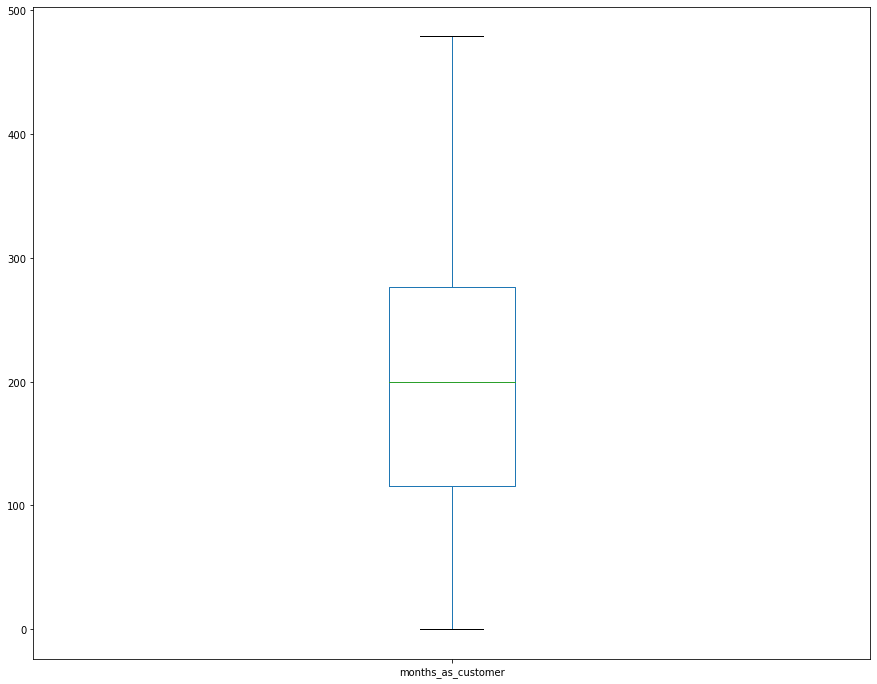

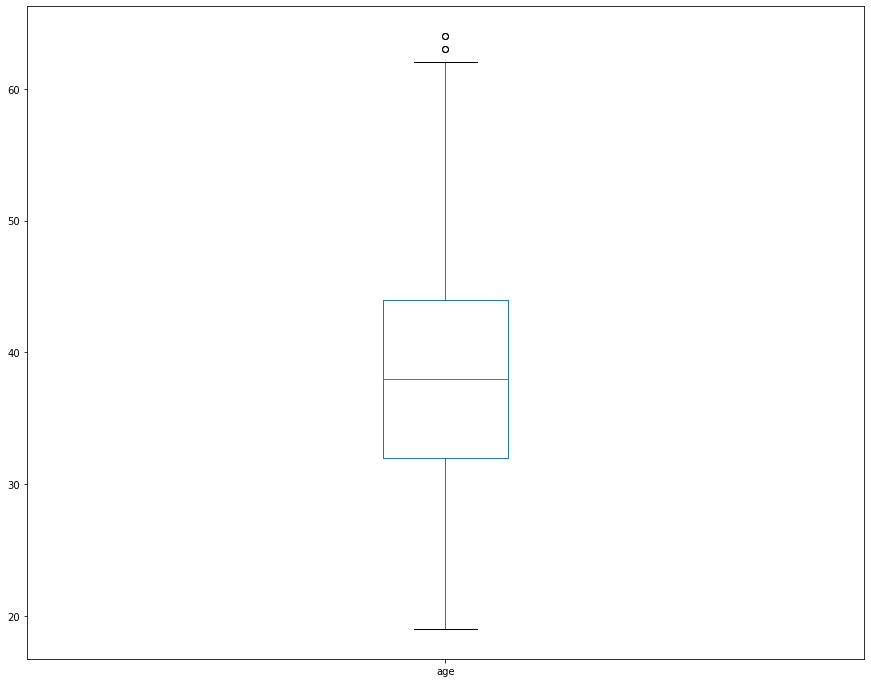

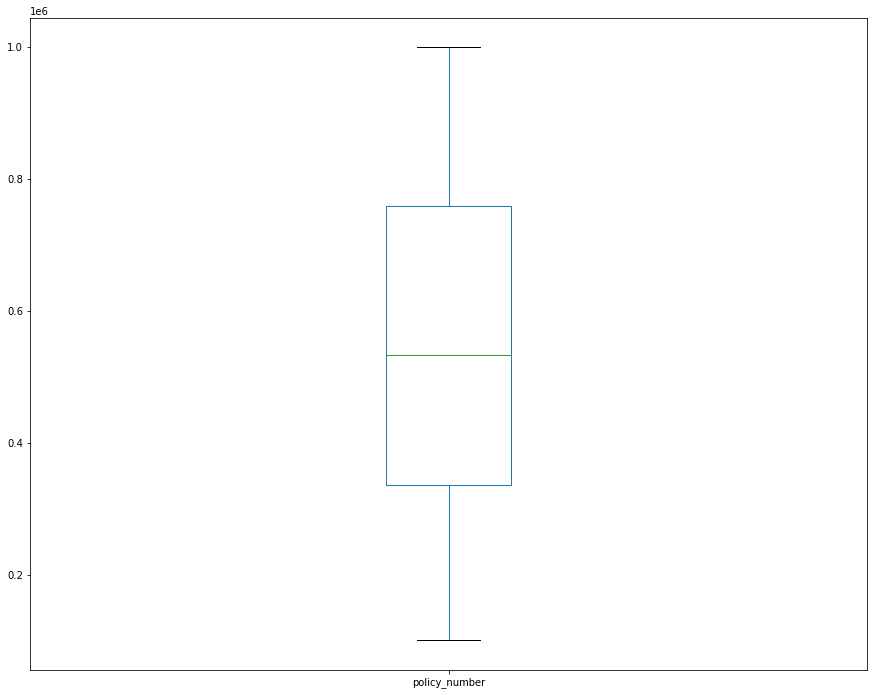

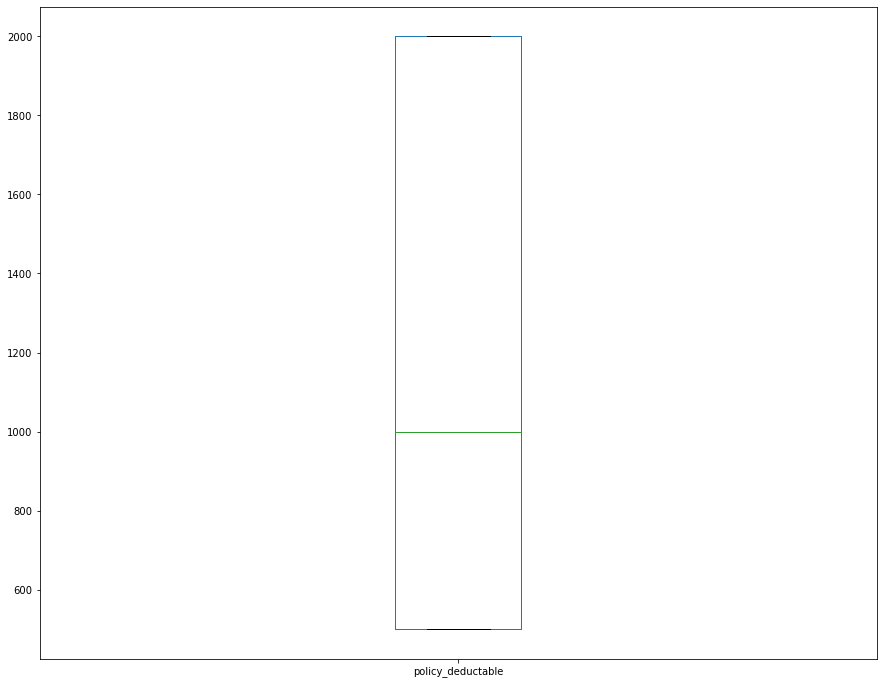

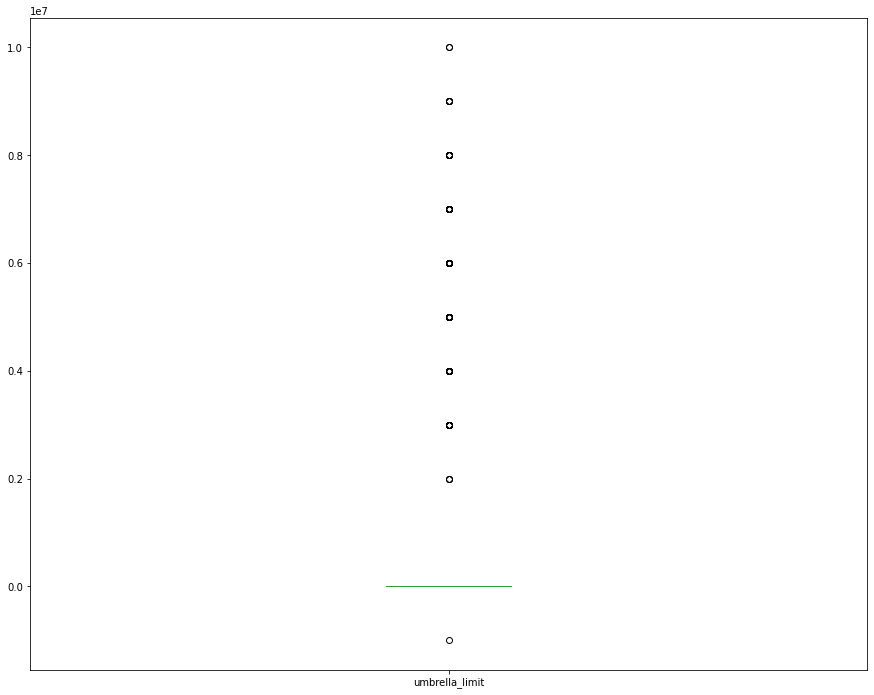

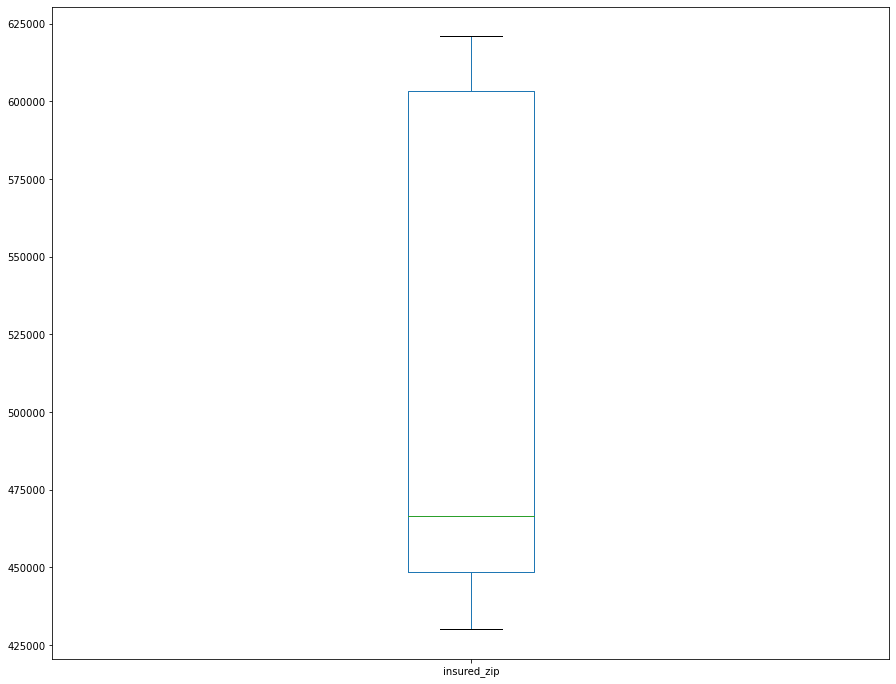

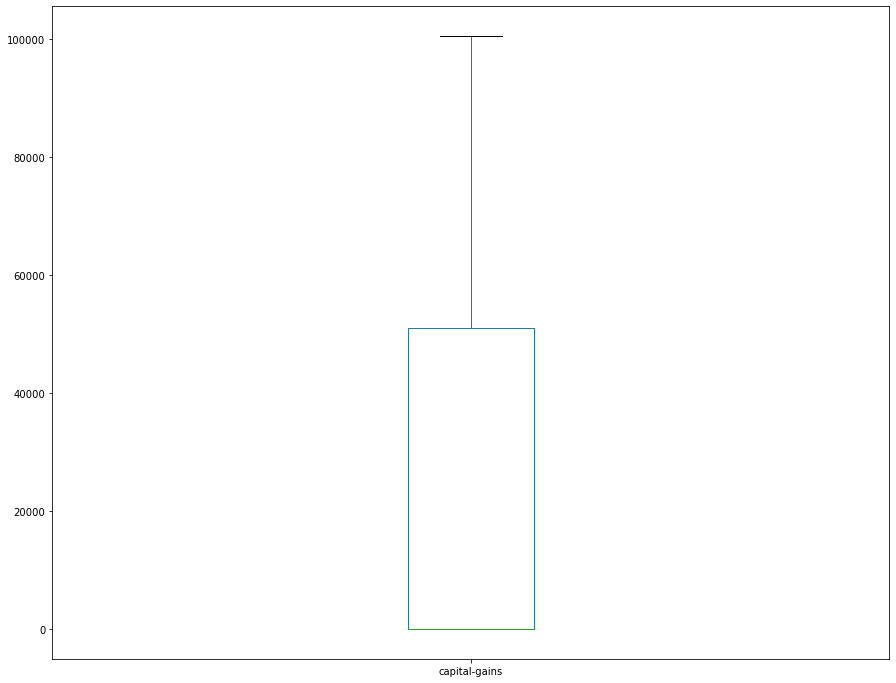

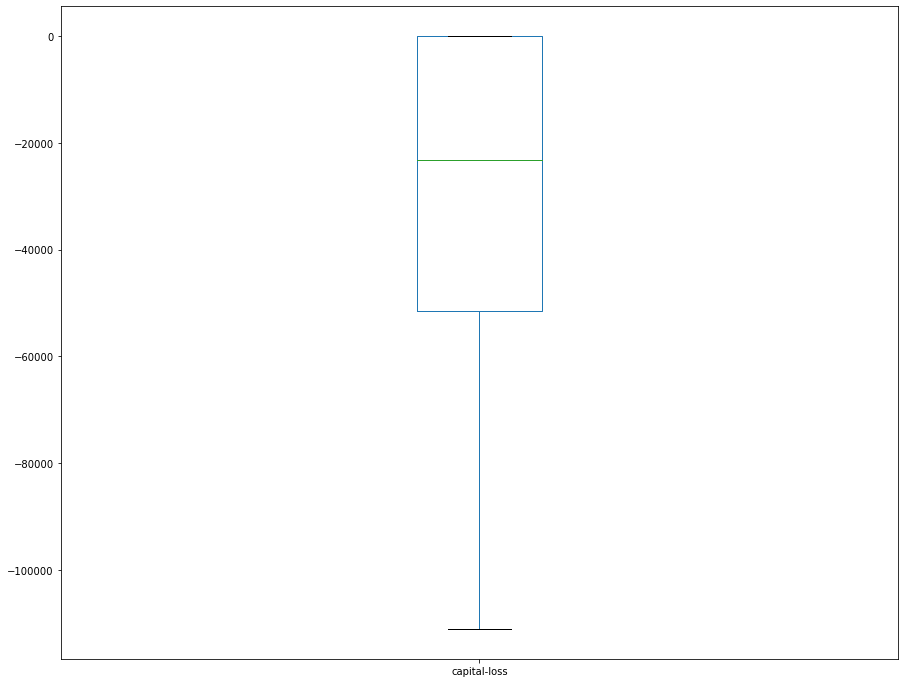

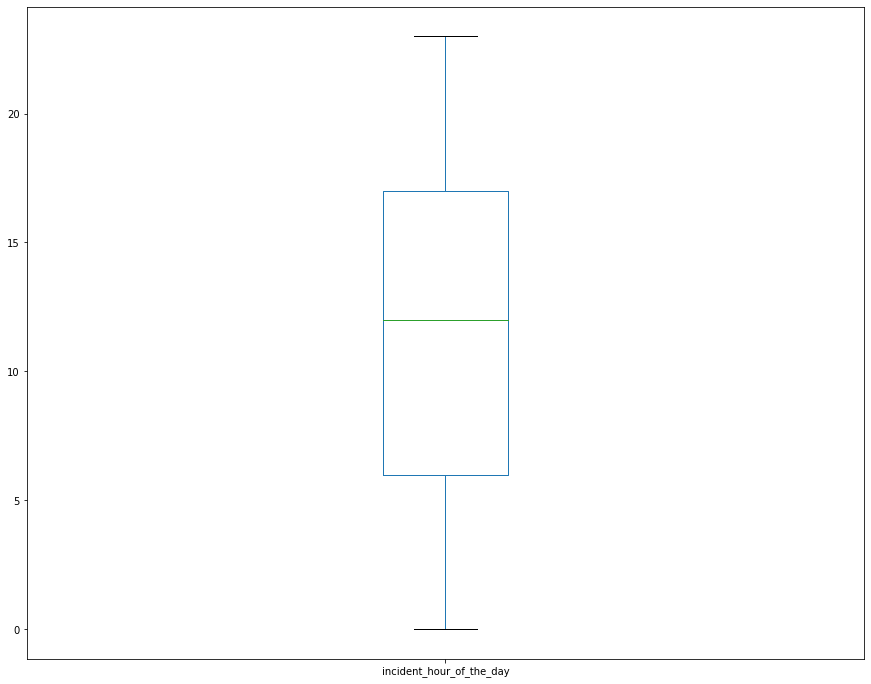

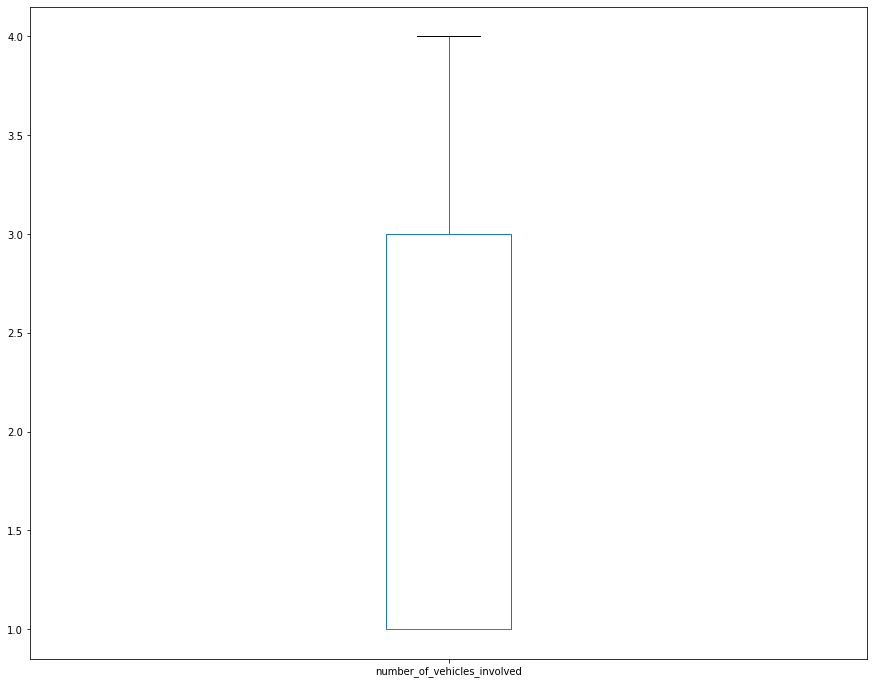

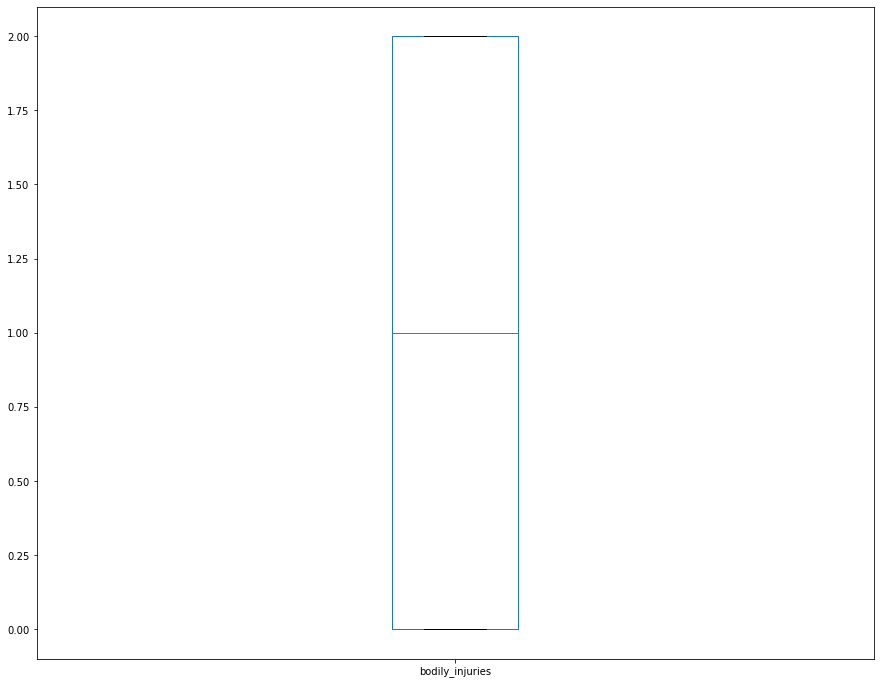

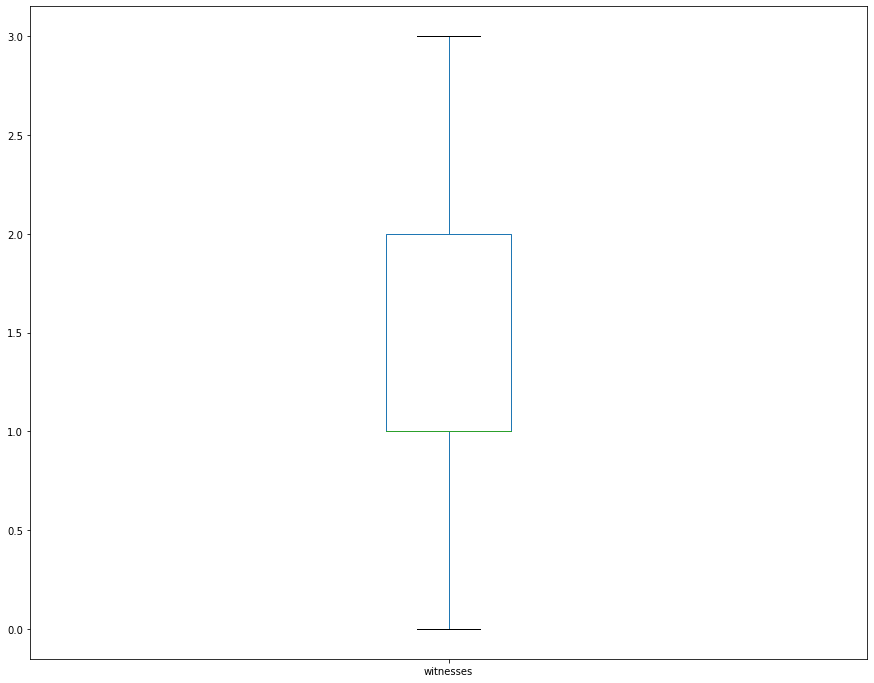

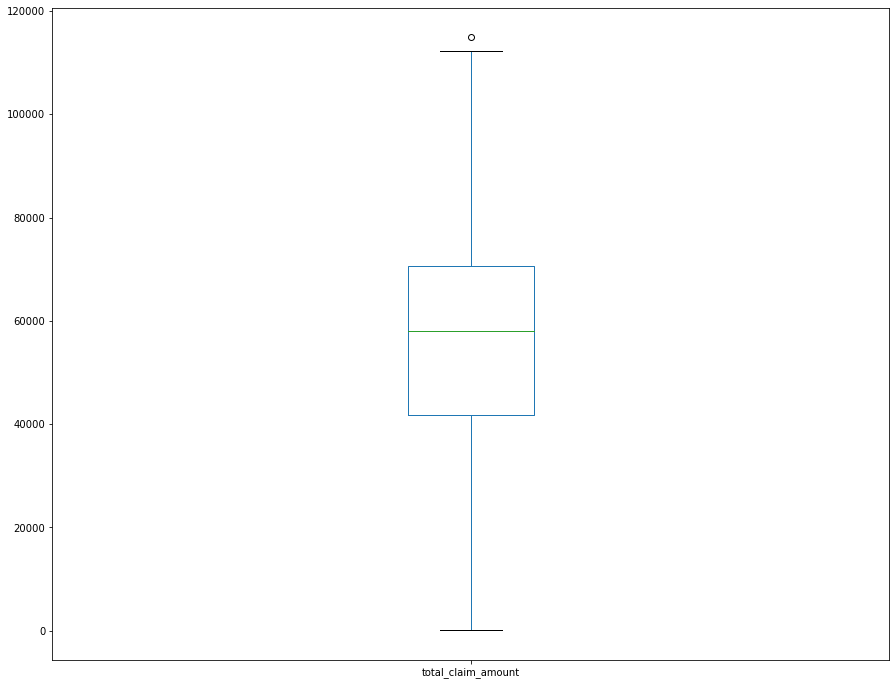

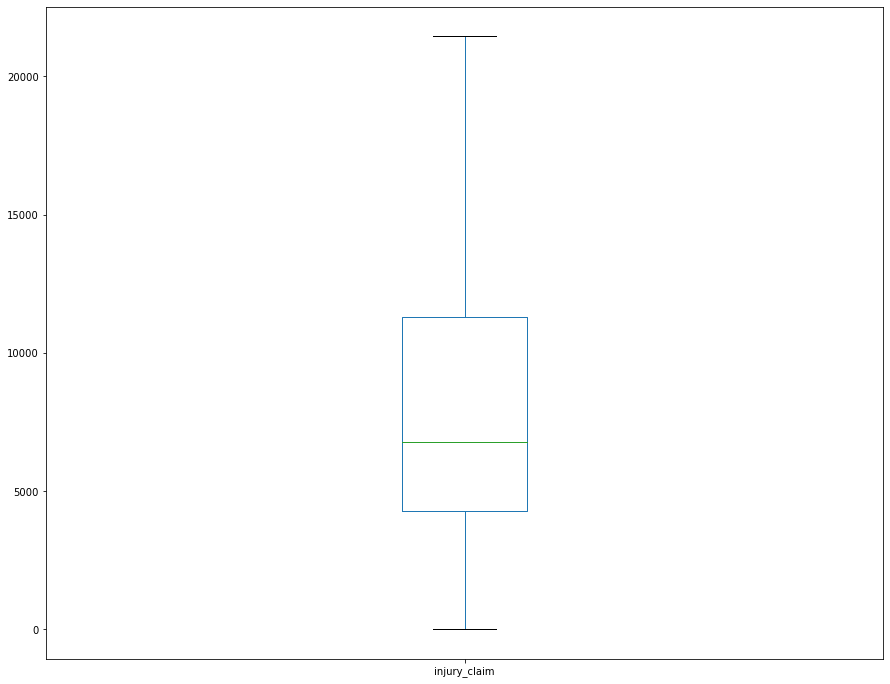

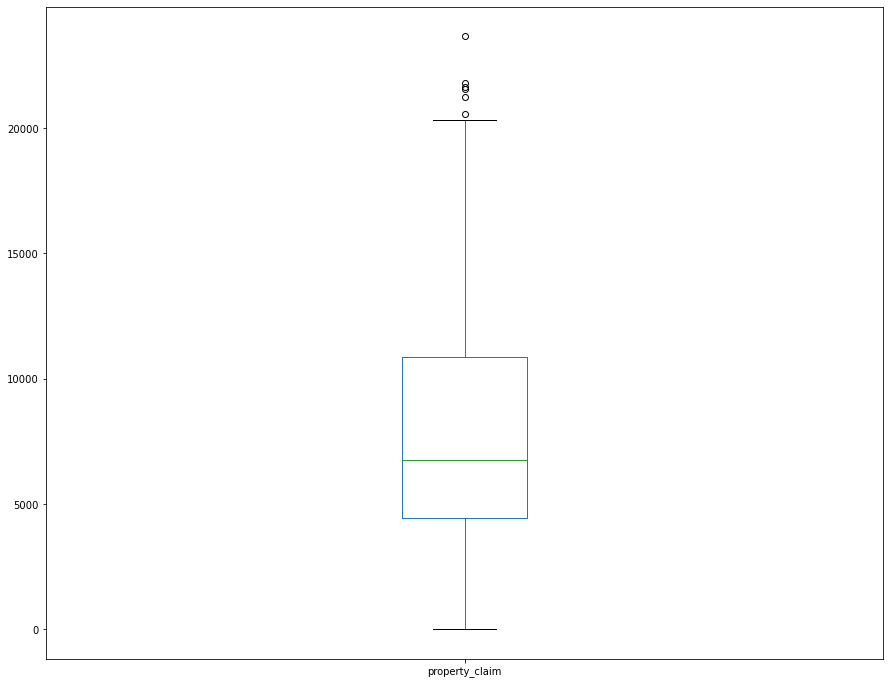

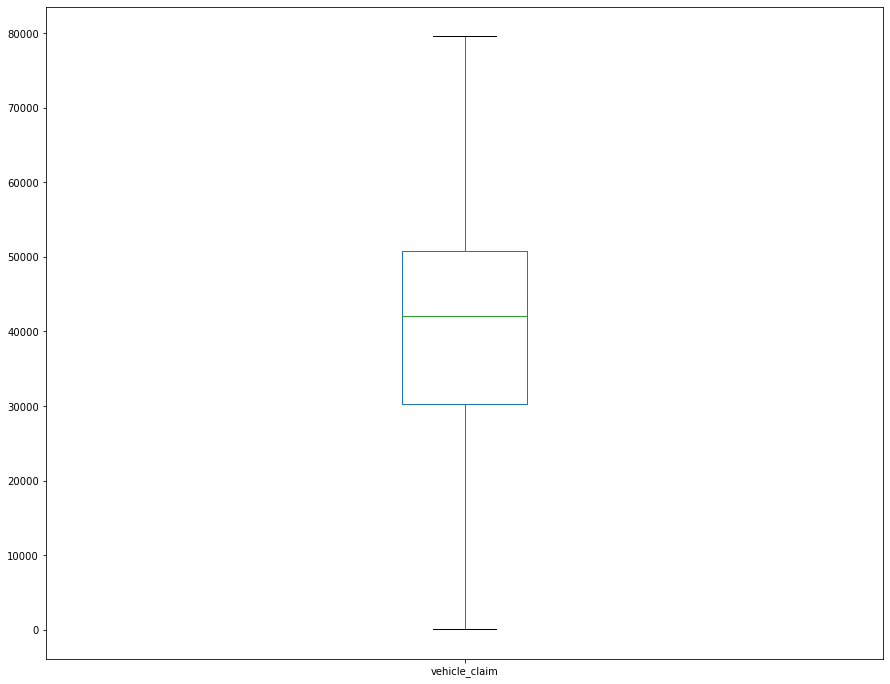

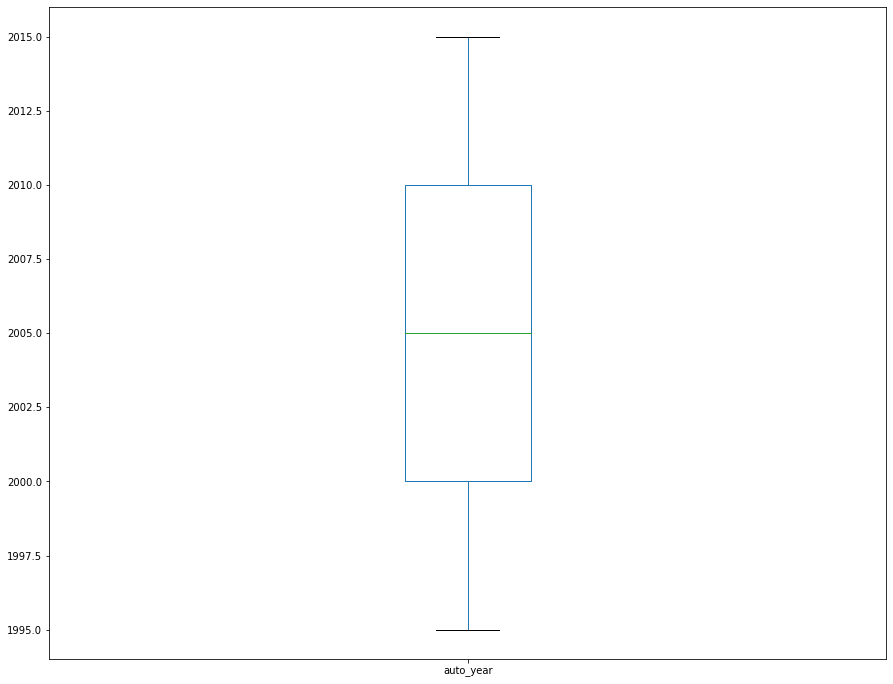

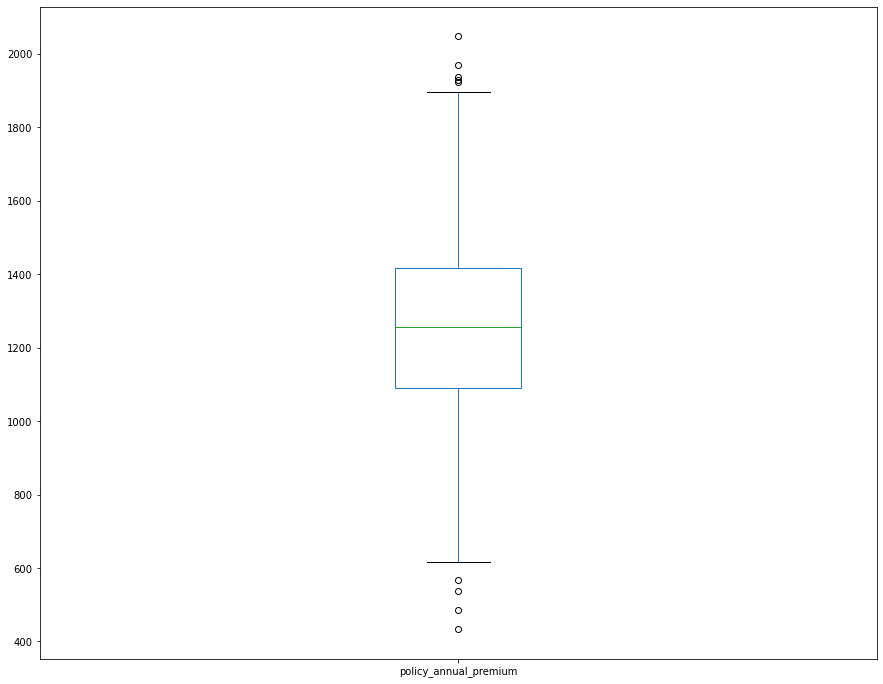

In [43]:
for i in cont_cols:
    plt.figure(figsize = (15, 12))
    dx[i].plot.box()

So there are Outliers are present in the data. But it is not an issue

In [47]:
dx[cont_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_annual_premium          0.004402
dtype: float64

Skewness is also not a big issue

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cate_cols:
    dx[col] = label_encoder.fit_transform(dx[col])


Using LabelEncoder to convert object data types into float or int, so we can use these values in models.

In [49]:
x = dx.drop('fraud_reported', axis = 1)
y = dx['fraud_reported']

# Best Random State

In [50]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 16


# Creating Train Test Split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 373)

In [52]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.81
[[241   2]
 [ 55   2]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       243
           1       0.50      0.04      0.07        57

    accuracy                           0.81       300
   macro avg       0.66      0.51      0.48       300
weighted avg       0.75      0.81      0.74       300

DecisionTreeClassifier()
0.83
[[214  29]
 [ 22  35]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       243
           1       0.55      0.61      0.58        57

    accuracy                           0.83       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.84      0.83      0.83       300

SVC()
0.81
[[243   0]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       243
           1       0.00      0.00      0.00        57

    accuracy                           0.81   

In [53]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.751
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.784
 
Cross Validation Score for  SVC()  model is : 0.7529999999999999
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.771
 


Here i got Cross VAalidation Score LogisticRegression() is 0.751 i.e 75.1%

# Hypertuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

In [56]:
gdtc = GridSearchCV(estimator= DTC, param_grid=param_grid, cv= 3)
gdtc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [57]:
gdtc.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [58]:
gdtc1 = DecisionTreeClassifier(random_state = 373, max_depth = 3, criterion = 'entropy')
gdtc1.fit(x_train, y_train)
predgdtc1 = gdtc1.predict(x_test)
print (accuracy_score(y_test, predgdtc1))
print (confusion_matrix(y_test, predgdtc1))
print (classification_report(y_test, predgdtc1))

0.8366666666666667
[[202  41]
 [  8  49]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       243
           1       0.54      0.86      0.67        57

    accuracy                           0.84       300
   macro avg       0.75      0.85      0.78       300
weighted avg       0.88      0.84      0.85       300



In [59]:
cvs = cross_val_score(gdtc1, x, y, cv = 5)
print ('Cross Validation Score for ',gdtc1, ' model is :', cvs.mean())

Cross Validation Score for  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=373)  model is : 0.865


After hypertuning with gridsearchcv our decision tree model's accuracy and cross val scores increased from 0.81 to 0.84 and 0.79 to 0.86 respectively.

In [60]:
import pickle

filename = 'Insurancegdtc.pkl'
pickle.dump(gdtc1, open(filename, 'wb'))

# Conclusion

In [61]:
loaded_model = pickle.load(open('Insurancegdtc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8366666666666667


In [63]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predgdtc1[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Predicted,0,1,1,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
Original,0,1,1,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


So finally Concluded the Target column. 